In [312]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk import word_tokenize
import csv
from collections import Counter
import string
import pandas as pd
from openpyxl import Workbook
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

In [313]:
files = os.listdir(os.getcwd())
files_txt = [f for f in files if f[-3:] == 'txt']
files1 = [f for f in files_txt if '1q23' in f]
files2 = [f for f in files_txt if '2q23' in f]

In [314]:
files1

['are1q23.txt',
 'bxp1q23.txt',
 'cold1q23.txt',
 'cuz1q23.txt',
 'dlr1q23.txt',
 'eqix1q23.txt',
 'eqr1q23.txt',
 'exr1q23.txt',
 'hr1q23.txt',
 'invh1q23.txt',
 'kim1q23.txt',
 'krc1q23.txt',
 'maa1q23.txt',
 'o1q23.txt',
 'pld1q23.txt',
 'psa1q23.txt',
 'reg1q23.txt',
 'vtr1q23.txt']

In [315]:
files2

['are2q23.txt',
 'bxp2q23.txt',
 'cold2q23.txt',
 'cuz2q23.txt',
 'dlr2q23.txt',
 'eqix2q23.txt',
 'eqr2q23.txt',
 'exr2q23.txt',
 'hr2q23.txt',
 'invh2q23.txt',
 'kim2q23.txt',
 'krc2q23.txt',
 'maa2q23.txt',
 'o2q23.txt',
 'pld2q23.txt',
 'psa2q23.txt',
 'reg2q23.txt',
 'vtr2q23.txt']

In [316]:
#Gives common names across files needed for comparison
#Same earnings calls in this case but not all quarters will have the same calls
list1 = []
list2 = []
for file1, file2 in zip(files1, files2):
    list1.append(file1[:-8])
    list2.append(file2[:-8])
    common_names = [file for file in list1 if file in list2]
common_names

['are',
 'bxp',
 'cold',
 'cuz',
 'dlr',
 'eqix',
 'eqr',
 'exr',
 'hr',
 'invh',
 'kim',
 'krc',
 'maa',
 'o',
 'pld',
 'psa',
 'reg',
 'vtr']

In [317]:
#Checks common_names list to see if the same name is in a list of files
#In this case, this is not needed as both files for each quarter have the same earnings calls
#In the future, this is needed to pull necessary files (files in common for both quarters) needed for comparison
def comparison_files(files, common_names):
    matching_files = []
    for name in common_names:
        for file in files:
            if name.lower() in file.lower():
                if file not in matching_files:
                    matching_files.append(file)
    return matching_files

In [318]:
files1 = comparison_files(files1, common_names)
files1

['are1q23.txt',
 'bxp1q23.txt',
 'cold1q23.txt',
 'cuz1q23.txt',
 'dlr1q23.txt',
 'eqix1q23.txt',
 'eqr1q23.txt',
 'exr1q23.txt',
 'hr1q23.txt',
 'invh1q23.txt',
 'kim1q23.txt',
 'krc1q23.txt',
 'maa1q23.txt',
 'o1q23.txt',
 'pld1q23.txt',
 'psa1q23.txt',
 'reg1q23.txt',
 'vtr1q23.txt']

In [319]:
files2 = comparison_files(files2, common_names)
files2

['are2q23.txt',
 'bxp2q23.txt',
 'cold2q23.txt',
 'cuz2q23.txt',
 'dlr2q23.txt',
 'eqix2q23.txt',
 'eqr2q23.txt',
 'exr2q23.txt',
 'hr2q23.txt',
 'invh2q23.txt',
 'kim2q23.txt',
 'krc2q23.txt',
 'maa2q23.txt',
 'o2q23.txt',
 'pld2q23.txt',
 'psa2q23.txt',
 'reg2q23.txt',
 'vtr2q23.txt']

In [320]:
def open_file(file):
    with open(file, "r") as f:
        contents = f.read()
    return contents

In [321]:
def word_list(text, remove_stop_words=True):
    word_list = []
    remove_words = []
    if remove_stop_words:
        remove_words = ['oh', 'like', 'well', 'just', 'basically', 'actually', 'so', 'right', 'okay', 'alright', 'um', 'yeah', 'pretty']
        stop_words = set(stopwords.words('english'))
        for word in list(stop_words):
            remove_words.append(word)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    for word in word_tokenize(text.lower()):
        if word not in remove_words:
            word = WordNetLemmatizer().lemmatize(word)
            word_list.append(word)
    return word_list

In [322]:
def transcript_list(files):
    text_list = []
    for file in files:
        text = open_file(file).split('Earnings Call\n\nPresentation')[1].replace('\n','').split('This transcript may not be 100 percent')[0].strip()
        text_list.append(word_list(text))
    return text_list

In [323]:
transcript1 = transcript_list(files1)
transcript1

[['operator',
  'good',
  'day',
  'welcome',
  'alexandria',
  'real',
  'estate',
  'equity',
  'first',
  'quarter',
  'conference',
  'call',
  'participant',
  'listenonly',
  'mode',
  'operator',
  'instruction',
  'please',
  'note',
  'event',
  'recorded',
  'would',
  'turn',
  'conference',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'please',
  'go',
  'ahead',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'thank',
  'good',
  'afternoon',
  'everyone',
  'conference',
  'call',
  'contains',
  'forwardlooking',
  'statement',
  'within',
  'meaning',
  'federal',
  'security',
  'law',
  'company',
  'actual',
  'result',
  'might',
  'differ',
  'materially',
  'projected',
  'forwardlooking',
  'statement',
  'additional',
  'information',
  'concerning',
  'factor',
  'could',
  'cause',
  'actual',
  'result',
  'differ',
  'materially',
  'forwardlooking',
  'statement',
  'contained',
  'company',
  'periodic',
  'report',
  'filed',
  'security'

In [324]:
transcript2 = transcript_list(files2)
transcript2

[['operator',
  'good',
  'day',
  'welcome',
  'alexandria',
  'real',
  'estate',
  'equity',
  'second',
  'quarter',
  'conference',
  'call',
  'participant',
  'listenonly',
  'mode',
  'operator',
  'instruction',
  'today',
  'presentation',
  'opportunity',
  'ask',
  'question',
  'operator',
  'instruction',
  'please',
  'note',
  'today',
  'event',
  'recorded',
  'would',
  'turn',
  'conference',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'please',
  'go',
  'ahead',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'thank',
  'good',
  'afternoon',
  'everyone',
  'conference',
  'call',
  'contains',
  'forwardlooking',
  'statement',
  'within',
  'meaning',
  'federal',
  'security',
  'law',
  'company',
  'actual',
  'result',
  'might',
  'differ',
  'materially',
  'projected',
  'forwardlooking',
  'statement',
  'additional',
  'information',
  'concerning',
  'factor',
  'could',
  'cause',
  'actual',
  'result',
  'differ',
  'materially',


In [325]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url, verify=False).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

In [326]:
def sentiment_analysis_unique(word_list):
    pos_words, neg_words = get_pos_neg_words()
    pos = set()
    neg = set()
    for word in word_list:
        if word in pos_words:
            if word not in pos:
                pos.add(word)
        if word in neg_words:
            if word not in neg:
                neg.add(word)
    return pos, len(pos), neg, len(neg)

In [327]:
#Lists and unique numbers of positive & negative words
def unique_list(transcript):
    pos_neg = []
    for text in transcript:
        pos_neg.append(sentiment_analysis_unique(text))
    return pos_neg

In [328]:
unique1 = unique_list(transcript1)
unique1

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[({'abundance',
   'advanced',
   'advantage',
   'amazing',
   'ambitious',
   'appreciable',
   'appreciate',
   'appreciated',
   'approval',
   'astounding',
   'attractive',
   'available',
   'award',
   'benefit',
   'best',
   'better',
   'capability',
   'clear',
   'clearly',
   'comfortable',
   'competitive',
   'confidence',
   'consistent',
   'contribution',
   'cornerstone',
   'correct',
   'decent',
   'deference',
   'diligence',
   'distinction',
   'diversified',
   'easy',
   'engaging',
   'enjoyed',
   'enough',
   'exceeded',
   'excellence',
   'excellent',
   'exceptional',
   'extraordinarily',
   'extraordinary',
   'fair',
   'fairly',
   'fantastic',
   'fast',
   'flexibility',
   'fortunate',
   'free',
   'gain',
   'good',
   'great',
   'guidance',
   'healthy',
   'helpful',
   'important',
   'impressed',
   'improve',
   'improved',
   'improvement',
   'innovation',
   'innovative',
   'integrated',
   'interesting',
   'judicious',
   'lead',
 

In [329]:
unique2 = unique_list(transcript2)
unique2

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[({'accomplishment',
   'achievement',
   'adequate',
   'advantage',
   'affirmation',
   'afford',
   'amazingly',
   'amenity',
   'appreciate',
   'approval',
   'astounding',
   'attractive',
   'available',
   'award',
   'awarded',
   'benefit',
   'best',
   'better',
   'bolster',
   'clear',
   'clearly',
   'comfort',
   'comfortable',
   'commitment',
   'competitive',
   'complementary',
   'concise',
   'confidence',
   'confident',
   'congratulation',
   'consistent',
   'consistently',
   'contribution',
   'correct',
   'cure',
   'diligence',
   'dynamic',
   'effective',
   'effectively',
   'enhance',
   'enhancement',
   'enough',
   'exceed',
   'exceeded',
   'excellence',
   'excellent',
   'excited',
   'extraordinarily',
   'fair',
   'favorable',
   'feat',
   'flexibility',
   'flexible',
   'fortunate',
   'gain',
   'gold',
   'golden',
   'good',
   'great',
   'groundbreaking',
   'guidance',
   'happy',
   'healthy',
   'helpful',
   'immense',
   'imp

In [330]:
def sentiment_analysis_total(word_list):
    pos_words, neg_words = get_pos_neg_words()
    pos = []
    neg = []
    for word in word_list:
        if word in pos_words:
            pos.append(word)
        if word in neg_words:
            neg.append(word)
    return pos, len(pos), round(len(pos)/len(word_list)*100,2), neg, len(neg), round(len(neg)/len(word_list)*100,2)

In [331]:
#Lists and total numbers and percentages of positive & negative words
def total_list(transcript):
    pos_neg2 = []
    for text in transcript:
        pos_neg2.append(sentiment_analysis_total(text))
    return pos_neg2

In [332]:
total1 = total_list(transcript1)
total1

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[(['good',
   'welcome',
   'thank',
   'good',
   'thank',
   'welcome',
   'thank',
   'strong',
   'tough',
   'tough',
   'pleased',
   'trusted',
   'award',
   'integrated',
   'unparalleled',
   'excellence',
   'protect',
   'talent',
   'rich',
   'abundance',
   'safe',
   'excellent',
   'innovation',
   'innovation',
   'work',
   'great',
   'progress',
   'tough',
   'tough',
   'solid',
   'stability',
   'strong',
   'guidance',
   'solid',
   'strong',
   'appreciate',
   'successfully',
   'judicious',
   'strong',
   'progress',
   'thank',
   'good',
   'innovation',
   'work',
   'significant',
   'support',
   'integrated',
   'work',
   'best',
   'trust',
   'strong',
   'significant',
   'free',
   'sensitive',
   'strong',
   'strong',
   'healthy',
   'innovative',
   'patient',
   'personalized',
   'promising',
   'innovation',
   'ambitious',
   'approval',
   'promising',
   'stellar',
   'clear',
   'cornerstone',
   'innovation',
   'support',
   'stron

In [333]:
total2 = total_list(transcript2)
total2

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[(['good',
   'welcome',
   'thank',
   'good',
   'thank',
   'welcome',
   'good',
   'tough',
   'favorable',
   'thank',
   'excellent',
   'winning',
   'gold',
   'award',
   'awarded',
   'best',
   'amazingly',
   'award',
   'innovative',
   'proud',
   'stellar',
   'great',
   'congratulation',
   'successful',
   'significant',
   'accomplishment',
   'strong',
   'strong',
   'nicely',
   'strong',
   'nicely',
   'positive',
   'stable',
   'solid',
   'strong',
   'guidance',
   'confidence',
   'successfully',
   'dynamic',
   'good',
   'positive',
   'thank',
   'good',
   'solid',
   'innovation',
   'achievement',
   'incredible',
   'innovation',
   'immense',
   'healthy',
   'significant',
   'healthy',
   'significant',
   'strong',
   'strong',
   'clear',
   'consistent',
   'healthy',
   'innovation',
   'promising',
   'meticulously',
   'enhance',
   'innovation',
   'groundbreaking',
   'strong',
   'golden',
   'bolster',
   'approval',
   'patient',
   '

In [334]:
def word_count(word_list):
    pos_word_list = sentiment_analysis_total(word_list)[0]
    neg_word_list = sentiment_analysis_total(word_list)[3]
    pos_top = sorted(Counter(pos_word_list).items(), key=lambda x: x[1], reverse=True)
    neg_top = sorted(Counter(neg_word_list).items(), key=lambda x: x[1], reverse=True)
    return pos_top, neg_top

In [335]:
#Lists of unique positive & negative words with their count
def count_list(transcript):
    count = []
    for text in transcript:
        count.append(word_count(text))
    return count

In [336]:
count1 = count_list(transcript1)
count1

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[([('strong', 34),
   ('good', 26),
   ('thank', 22),
   ('great', 14),
   ('significant', 12),
   ('guidance', 10),
   ('work', 9),
   ('rich', 7),
   ('helpful', 7),
   ('excellence', 6),
   ('excellent', 6),
   ('innovation', 6),
   ('progress', 6),
   ('appreciate', 6),
   ('competitive', 6),
   ('gain', 6),
   ('fairly', 6),
   ('tough', 5),
   ('best', 5),
   ('better', 5),
   ('attractive', 5),
   ('comfortable', 5),
   ('solid', 4),
   ('support', 4),
   ('approval', 4),
   ('important', 4),
   ('trusted', 3),
   ('clear', 3),
   ('improvement', 3),
   ('timely', 3),
   ('reasonably', 3),
   ('clearly', 3),
   ('welcome', 2),
   ('pleased', 2),
   ('integrated', 2),
   ('abundance', 2),
   ('judicious', 2),
   ('free', 2),
   ('patient', 2),
   ('promising', 2),
   ('fast', 2),
   ('prudence', 2),
   ('skilled', 2),
   ('contribution', 2),
   ('benefit', 2),
   ('consistent', 2),
   ('exceptional', 2),
   ('fair', 2),
   ('impressed', 2),
   ('willing', 2),
   ('enough', 2),
  

In [337]:
count2 = count_list(transcript2)
count2

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[([('thank', 22),
   ('strong', 18),
   ('guidance', 18),
   ('good', 15),
   ('great', 12),
   ('solid', 12),
   ('significant', 11),
   ('innovation', 9),
   ('top', 8),
   ('competitive', 7),
   ('positive', 6),
   ('appreciate', 6),
   ('best', 5),
   ('consistent', 5),
   ('important', 5),
   ('excellence', 5),
   ('work', 5),
   ('available', 5),
   ('healthy', 4),
   ('benefit', 4),
   ('progress', 4),
   ('effective', 4),
   ('excellent', 3),
   ('successful', 3),
   ('stable', 3),
   ('confidence', 3),
   ('approval', 3),
   ('pleased', 3),
   ('fair', 3),
   ('gain', 3),
   ('comfortable', 3),
   ('welcome', 2),
   ('award', 2),
   ('proud', 2),
   ('nicely', 2),
   ('incredible', 2),
   ('clear', 2),
   ('golden', 2),
   ('patient', 2),
   ('improve', 2),
   ('clearly', 2),
   ('excited', 2),
   ('complementary', 2),
   ('exceeded', 2),
   ('variety', 2),
   ('amenity', 2),
   ('pure', 2),
   ('enough', 2),
   ('improvement', 2),
   ('modest', 2),
   ('ready', 2),
   ('enhan

In [338]:
#Top 10 most common positive/negative words across all earning calls
def top_ten(count_list, index):
    word_sum = {}
    for call in count_list:
        for word, freq in call[index]:
            if word in word_sum:
                word_sum[word] += freq
            else:
                word_sum[word] = freq
    total = sorted(word_sum.items(), key=lambda x: x[1], reverse=True)[:10]
    return total

In [339]:
pos1 = top_ten(count1, 0)
pos1

[('good', 402),
 ('thank', 394),
 ('strong', 224),
 ('great', 205),
 ('guidance', 180),
 ('work', 109),
 ('better', 105),
 ('significant', 100),
 ('positive', 79),
 ('benefit', 69)]

In [340]:
neg1 = top_ten(count1, 1)
neg1

[('vice', 227),
 ('debt', 153),
 ('risk', 63),
 ('inaudible', 53),
 ('bad', 47),
 ('issue', 34),
 ('negative', 31),
 ('hard', 28),
 ('decline', 26),
 ('loss', 26)]

In [341]:
pos2 = top_ten(count2, 0)
pos2

[('good', 366),
 ('thank', 313),
 ('guidance', 248),
 ('strong', 232),
 ('great', 160),
 ('work', 120),
 ('better', 109),
 ('significant', 84),
 ('positive', 81),
 ('available', 65)]

In [342]:
neg2 = top_ten(count2, 1)
neg2

[('vice', 234),
 ('debt', 131),
 ('risk', 57),
 ('inaudible', 40),
 ('issue', 38),
 ('hard', 37),
 ('negative', 36),
 ('bad', 33),
 ('cloud', 30),
 ('loss', 29)]

In [343]:
def pos_graph(total_pos):
    # Sort the data in descending order by values
    sorted_data = sorted(total_pos, key=lambda x: x[1], reverse=False)

    # Extract sorted keys and values from the sorted data
    words = [item[0] for item in sorted_data]
    frequencies = [item[1] for item in sorted_data]

    # Plotting the horizontal bar graph
    plt.barh(words, frequencies, color='#808080')

    # Adding labels and title
    plt.xlabel('Count')
    plt.ylabel('Positive Words')
    plt.title('Top 10 Positive Words Across All Earnings Calls')

    # Adding number labels to the bars
    for i in range(len(words)):
        plt.text(frequencies[i], i, str(frequencies[i]), ha='left', va='center')

    # Displaying the bar graph
    plt.show()

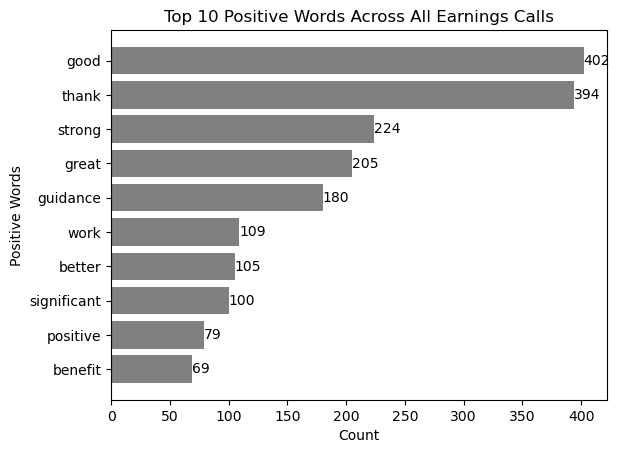

In [344]:
pos_graph(pos1)

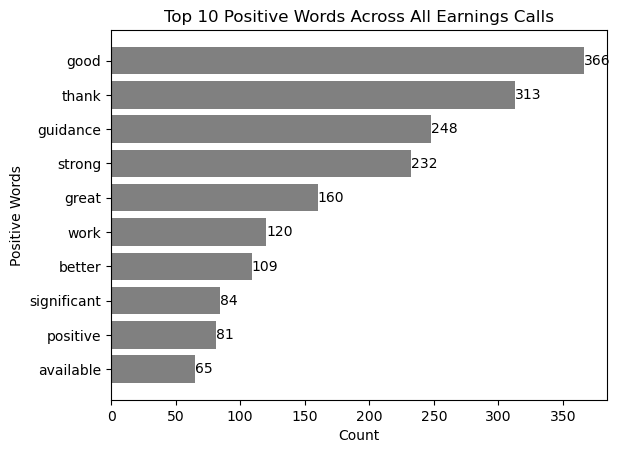

In [345]:
pos_graph(pos2)

In [346]:
def neg_graph(total_neg):    
    # Sort the data in descending order by values
    sorted_data = sorted(total_neg, key=lambda x: x[1], reverse=False)

    # Extract sorted keys and values from the sorted data
    words = [item[0] for item in sorted_data]
    frequencies = [item[1] for item in sorted_data]

    # Plotting the horizontal bar graph
    plt.barh(words, frequencies, color='#808080')

    # Adding labels and title
    plt.xlabel('Count')
    plt.ylabel('Negative Words')
    plt.title('Top 10 Negative Words Across All Earnings Calls')

    # Adding number labels to the bars
    for i in range(len(words)):
        plt.text(frequencies[i], i, str(frequencies[i]), ha='left', va='center')

    # Displaying the bar graph
    plt.show()

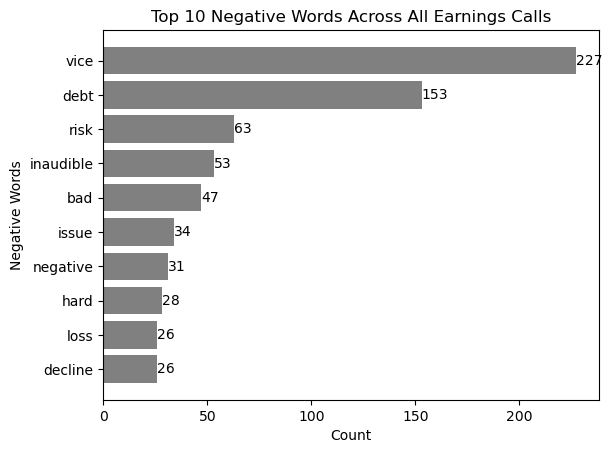

In [347]:
neg_graph(neg1)

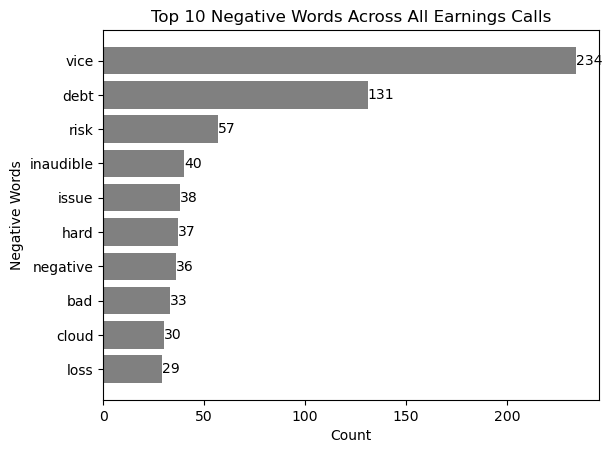

In [348]:
neg_graph(neg2)

In [349]:
#Number of unique positive and negative words
pos_unique1 = []
pos_unique2 = []
neg_unique1 = []
neg_unique2 = []
for call in unique1:
    pos_unique1.append(call[1])
    neg_unique1.append(call[3])
for call in unique2:
    pos_unique2.append(call[1])
    neg_unique2.append(call[3])
print(pos_unique1)
print(pos_unique2)
print(neg_unique1)
print(neg_unique2)

[123, 96, 88, 95, 108, 103, 105, 67, 91, 100, 91, 124, 83, 103, 79, 90, 103, 97]
[118, 99, 65, 94, 109, 100, 125, 75, 67, 106, 87, 104, 74, 100, 82, 89, 93, 86]
[62, 42, 33, 41, 40, 44, 66, 34, 19, 51, 43, 58, 44, 39, 62, 24, 50, 18]
[46, 50, 23, 42, 31, 33, 65, 43, 21, 49, 34, 47, 44, 35, 44, 32, 30, 32]


In [350]:
#Number of total positive and negative words and percentages
pos_total1 = []
pos_total2 = []
pos_per1 = []
pos_per2 = []
neg_total1 = []
neg_total2 = []
neg_per1 = []
neg_per2 = []
for call in total1:
    pos_total1.append(call[1])
    pos_per1.append(call[2])
    neg_total1.append(call[4])
    neg_per1.append(call[5])
for call in total2:
    pos_total2.append(call[1])
    pos_per2.append(call[2])
    neg_total2.append(call[4])
    neg_per2.append(call[5])
print(pos_total1)
print(pos_total2)
print(pos_per1)
print(pos_per2)
print(neg_total1)
print(neg_total2)
print(neg_per1)
print(neg_per2)

[359, 250, 238, 259, 308, 309, 329, 159, 207, 273, 241, 308, 291, 249, 188, 227, 323, 300]
[330, 270, 172, 288, 323, 295, 369, 214, 167, 325, 219, 236, 250, 219, 193, 288, 297, 255]
[5.42, 4.74, 5.41, 6.33, 5.75, 5.54, 5.12, 5.39, 5.37, 5.88, 5.67, 5.67, 5.42, 5.49, 3.99, 6.57, 6.15, 7.08]
[5.46, 4.88, 4.39, 6.62, 6.14, 5.7, 6.41, 4.96, 4.98, 6.05, 5.0, 5.08, 4.9, 5.01, 4.43, 6.18, 6.01, 6.97]
[102, 83, 67, 103, 65, 92, 161, 72, 39, 119, 101, 124, 142, 70, 116, 51, 139, 50]
[75, 88, 54, 78, 59, 76, 173, 72, 41, 95, 80, 90, 110, 98, 70, 89, 106, 74]
[1.54, 1.57, 1.52, 2.52, 1.21, 1.65, 2.51, 2.44, 1.01, 2.56, 2.38, 2.28, 2.64, 1.54, 2.46, 1.48, 2.65, 1.18]
[1.24, 1.59, 1.38, 1.79, 1.12, 1.47, 3.01, 1.67, 1.22, 1.77, 1.83, 1.94, 2.16, 2.24, 1.61, 1.91, 2.14, 2.02]


In [351]:
q1 = {}
for a, b, c, d, e, f, g in zip(common_names, pos_unique1, pos_total1, pos_per1, neg_unique1, neg_total1, neg_per1):
    q1[a] = ['Q1', b, c, d, e, f, g]
q1

{'are': ['Q1', 123, 359, 5.42, 62, 102, 1.54],
 'bxp': ['Q1', 96, 250, 4.74, 42, 83, 1.57],
 'cold': ['Q1', 88, 238, 5.41, 33, 67, 1.52],
 'cuz': ['Q1', 95, 259, 6.33, 41, 103, 2.52],
 'dlr': ['Q1', 108, 308, 5.75, 40, 65, 1.21],
 'eqix': ['Q1', 103, 309, 5.54, 44, 92, 1.65],
 'eqr': ['Q1', 105, 329, 5.12, 66, 161, 2.51],
 'exr': ['Q1', 67, 159, 5.39, 34, 72, 2.44],
 'hr': ['Q1', 91, 207, 5.37, 19, 39, 1.01],
 'invh': ['Q1', 100, 273, 5.88, 51, 119, 2.56],
 'kim': ['Q1', 91, 241, 5.67, 43, 101, 2.38],
 'krc': ['Q1', 124, 308, 5.67, 58, 124, 2.28],
 'maa': ['Q1', 83, 291, 5.42, 44, 142, 2.64],
 'o': ['Q1', 103, 249, 5.49, 39, 70, 1.54],
 'pld': ['Q1', 79, 188, 3.99, 62, 116, 2.46],
 'psa': ['Q1', 90, 227, 6.57, 24, 51, 1.48],
 'reg': ['Q1', 103, 323, 6.15, 50, 139, 2.65],
 'vtr': ['Q1', 97, 300, 7.08, 18, 50, 1.18]}

In [352]:
q2 = {}
for a, b, c, d, e, f, g in zip(common_names, pos_unique2, pos_total2, pos_per2, neg_unique2, neg_total2, neg_per2):
    q2[a] = ['Q2', b, c, d, e, f, g]
q2

{'are': ['Q2', 118, 330, 5.46, 46, 75, 1.24],
 'bxp': ['Q2', 99, 270, 4.88, 50, 88, 1.59],
 'cold': ['Q2', 65, 172, 4.39, 23, 54, 1.38],
 'cuz': ['Q2', 94, 288, 6.62, 42, 78, 1.79],
 'dlr': ['Q2', 109, 323, 6.14, 31, 59, 1.12],
 'eqix': ['Q2', 100, 295, 5.7, 33, 76, 1.47],
 'eqr': ['Q2', 125, 369, 6.41, 65, 173, 3.01],
 'exr': ['Q2', 75, 214, 4.96, 43, 72, 1.67],
 'hr': ['Q2', 67, 167, 4.98, 21, 41, 1.22],
 'invh': ['Q2', 106, 325, 6.05, 49, 95, 1.77],
 'kim': ['Q2', 87, 219, 5.0, 34, 80, 1.83],
 'krc': ['Q2', 104, 236, 5.08, 47, 90, 1.94],
 'maa': ['Q2', 74, 250, 4.9, 44, 110, 2.16],
 'o': ['Q2', 100, 219, 5.01, 35, 98, 2.24],
 'pld': ['Q2', 82, 193, 4.43, 44, 70, 1.61],
 'psa': ['Q2', 89, 288, 6.18, 32, 89, 1.91],
 'reg': ['Q2', 93, 297, 6.01, 30, 106, 2.14],
 'vtr': ['Q2', 86, 255, 6.97, 32, 74, 2.02]}

In [353]:
df1 = pd.DataFrame(q1)
df1 = df1.T
df1.reset_index(drop=False, inplace=True)
df1.columns = ['Investment', 'Quarter', 'Number of Unique Positive Words', 'Number of All Positive Words','Percentage of Positive Words',
               'Number of Unique Negative Words', 'Number of All Negative Words', 'Percentage of Negative Words']
df1

Investment Quarter Number of Unique Positive Words  \
0         are      Q1                             123   
1         bxp      Q1                              96   
2        cold      Q1                              88   
3         cuz      Q1                              95   
4         dlr      Q1                             108   
5        eqix      Q1                             103   
6         eqr      Q1                             105   
7         exr      Q1                              67   
8          hr      Q1                              91   
9        invh      Q1                             100   
10        kim      Q1                              91   
11        krc      Q1                             124   
12        maa      Q1                              83   
13          o      Q1                             103   
14        pld      Q1                              79   
15        psa      Q1                              90   
16        reg      Q1                             103   
17        vtr      Q1                              97   

   Number of All Positive Words Percentage of Positive Words  \
0                           359                         5.42   
1                           250                         4.74   
2                           238                         5.41   
3                           259                         6.33   
4                           308                         5.75   
5                           309                         5.54   
6                           329                         5.12   
7                           159                         5.39   
8                           207                         5.37   
9                           273                         5.88   
10                          241                         5.67   
11                          308                         5.67   
12                          291                         5.42   
13                          249                         5.49   
14                          188                         3.99   
15                          227                         6.57   
16                          323                         6.15   
17                          300                         7.08   

   Number of Unique Negative Words Number of All Negative Words  \
0                               62                          102   
1                               42                           83   
2                               33                           67   
3                               41                          103   
4                               40                           65   
5                               44                           92   
6                               66                          161   
7                               34                           72   
8                               19                           39   
9                               51                          119   
10                              43                          101   
11                              58                          124   
12                              44                          142   
13                              39                           70   
14                              62                          116   
15                              24                           51   
16                              50                          139   
17                              18                           50   

   Percentage of Negative Words  
0                          1.54  
1                          1.57  
2                          1.52  
3                          2.52  
4                          1.21  
5                          1.65  
6                          2.51  
7                          2.44  
8                          1.01  
9                          2.56  
10                         2.38  
11                  

In [354]:
df2 = pd.DataFrame(q2)
df2 = df2.T
df2.reset_index(drop=False, inplace=True)
df2.columns = ['Investment', 'Quarter', 'Number of Unique Positive Words', 'Number of All Positive Words','Percentage of Positive Words',
               'Number of Unique Negative Words', 'Number of All Negative Words', 'Percentage of Negative Words']
df2

Investment Quarter Number of Unique Positive Words  \
0         are      Q2                             118   
1         bxp      Q2                              99   
2        cold      Q2                              65   
3         cuz      Q2                              94   
4         dlr      Q2                             109   
5        eqix      Q2                             100   
6         eqr      Q2                             125   
7         exr      Q2                              75   
8          hr      Q2                              67   
9        invh      Q2                             106   
10        kim      Q2                              87   
11        krc      Q2                             104   
12        maa      Q2                              74   
13          o      Q2                             100   
14        pld      Q2                              82   
15        psa      Q2                              89   
16        reg      Q2                              93   
17        vtr      Q2                              86   

   Number of All Positive Words Percentage of Positive Words  \
0                           330                         5.46   
1                           270                         4.88   
2                           172                         4.39   
3                           288                         6.62   
4                           323                         6.14   
5                           295                          5.7   
6                           369                         6.41   
7                           214                         4.96   
8                           167                         4.98   
9                           325                         6.05   
10                          219                          5.0   
11                          236                         5.08   
12                          250                          4.9   
13                          219                         5.01   
14                          193                         4.43   
15                          288                         6.18   
16                          297                         6.01   
17                          255                         6.97   

   Number of Unique Negative Words Number of All Negative Words  \
0                               46                           75   
1                               50                           88   
2                               23                           54   
3                               42                           78   
4                               31                           59   
5                               33                           76   
6                               65                          173   
7                               43                           72   
8                               21                           41   
9                               49                           95   
10                              34                           80   
11                              47                           90   
12                              44                          110   
13                              35                           98   
14                              44                           70   
15                              32                           89   
16                              30                          106   
17                              32                           74   

   Percentage of Negative Words  
0                          1.24  
1                          1.59  
2                          1.38  
3                          1.79  
4                          1.12  
5                          1.47  
6                          3.01  
7                          1.67  
8                          1.22  
9                          1.77  
10                         1.83  
11                  

In [355]:
df = pd.concat([df1, df2], ignore_index=True)
df = df.sort_values(by='Investment')
df = df.set_index('Investment').reset_index()
df

Investment Quarter Number of Unique Positive Words  \
0         are      Q1                             123   
1         are      Q2                             118   
2         bxp      Q1                              96   
3         bxp      Q2                              99   
4        cold      Q1                              88   
5        cold      Q2                              65   
6         cuz      Q2                              94   
7         cuz      Q1                              95   
8         dlr      Q2                             109   
9         dlr      Q1                             108   
10       eqix      Q1                             103   
11       eqix      Q2                             100   
12        eqr      Q2                             125   
13        eqr      Q1                             105   
14        exr      Q1                              67   
15        exr      Q2                              75   
16         hr      Q1                              91   
17         hr      Q2                              67   
18       invh      Q1                             100   
19       invh      Q2                             106   
20        kim      Q2                              87   
21        kim      Q1                              91   
22        krc      Q2                             104   
23        krc      Q1                             124   
24        maa      Q1                              83   
25        maa      Q2                              74   
26          o      Q2                             100   
27          o      Q1                             103   
28        pld      Q2                              82   
29        pld      Q1                              79   
30        psa      Q2                              89   
31        psa      Q1                              90   
32        reg      Q2                              93   
33        reg      Q1                             103   
34        vtr      Q1                              97   
35        vtr      Q2                              86   

   Number of All Positive Words Percentage of Positive Words  \
0                           359                         5.42   
1                           330                         5.46   
2                           250                         4.74   
3                           270                         4.88   
4                           238                         5.41   
5                           172                         4.39   
6                           288                         6.62   
7                           259                         6.33   
8                           323                         6.14   
9                           308                         5.75   
10                          309                         5.54   
11                          295                          5.7   
12                          369                         6.41   
13                          329                         5.12   
14                          159                         5.39   
15                          214                         4.96   
16                          207                         5.37   
17                          167                         4.98   
18                          273                         5.88   
19                          325                         6.05   
20                          219                          5.0   
21                          241                         5.67   
22                          236                         5.08   
23                          308                         5.67   
24                          291                         5.42   
25                          250                          4.9   
26                          219                         5.01   
27                          249                         5.49   
28                          193      

In [363]:
#Total numbers across all earning calls for positive & negative words
print('Total Number of Unique Positive Words (Q1):', sum(pos_unique1))
print('Total Number of All Positive Words (Q1):', sum(pos_total1))
print('Total Number of Unique Negative Words (Q1):', sum(neg_unique1))
print('Total Number of All Negative Words (Q1):', sum(neg_total1))
print('Total Number of Unique Positive Words (Q2):', sum(pos_unique2))
print('Total Number of All Positive Words (Q2):', sum(pos_total2))
print('Total Number of Unique Negative Words (Q2):', sum(neg_unique2))
print('Total Number of All Negative Words (Q2):', sum(neg_total2))

Total Number of Unique Positive Words (Q1): 1746
Total Number of All Positive Words (Q1): 4818
Total Number of Unique Negative Words (Q1): 770
Total Number of All Negative Words (Q1): 1696
Total Number of Unique Positive Words (Q2): 1673
Total Number of All Positive Words (Q2): 4710
Total Number of Unique Negative Words (Q2): 701
Total Number of All Negative Words (Q2): 1528


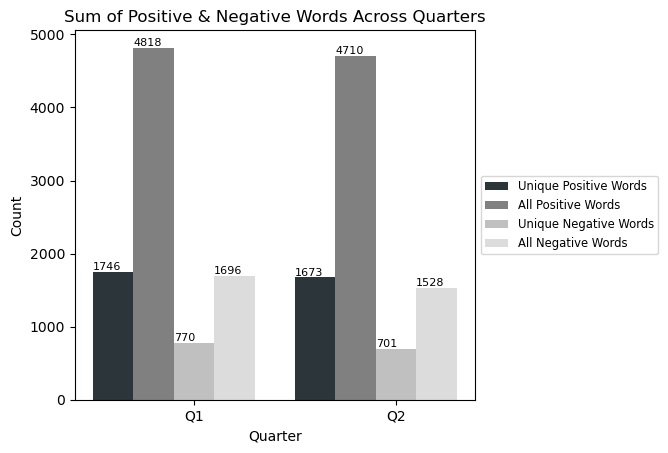

In [364]:
# Data
quarters = ['Q1', 'Q2']
unique_pos = [sum(pos_unique1), sum(pos_unique2)]
all_pos = [sum(pos_total1), sum(pos_total2)]
unique_neg = [sum(neg_unique1), sum(neg_unique2)]
all_neg = [sum(neg_total1), sum(neg_total2)]

# Set the positions and width for the bars
positions = np.arange(len(quarters))
bar_width = 0.2

# Create the grouped bar graph
plt.bar(positions - bar_width, unique_pos, bar_width, label='Unique Positive Words', color='#2C3539')
plt.bar(positions, all_pos, bar_width, label='All Positive Words', color='#808080')
plt.bar(positions + bar_width, unique_neg, bar_width, label='Unique Negative Words', color='#C0C0C0')
plt.bar(positions + 2 * bar_width, all_neg, bar_width, label='All Negative Words', color='#DCDCDC')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Sum of Positive & Negative Words Across Quarters')
plt.xticks(positions + bar_width, quarters)
plt.legend()

# Adding number labels to the bars
for i in range(len(quarters)):
    plt.text(positions[i] - 0.3, unique_pos[i] + 30, str(unique_pos[i]), fontsize=8)
    plt.text(positions[i] - 0.1, all_pos[i] + 30, str(all_pos[i]), fontsize=8)
    plt.text(positions[i] + 0.1, unique_neg[i] + 30, str(unique_neg[i]), fontsize=8)
    plt.text(positions[i] + 0.3, all_neg[i] + 30, str(all_neg[i]), fontsize=8)

# Move the legend to the side of the graph without changing graph size
plt.legend(loc='center left',fontsize='small',bbox_to_anchor=(1, 0.5))

# Displaying the bar graph
plt.subplots_adjust(right=0.75)  # Adjust right margin for legend
plt.show()

In [369]:
#Percent change of total numbers across all earning calls for positive & negative words
print('Total Number of Unique Positive Words Percent Change (Q2):', round((sum(pos_unique2)-sum(pos_unique1))/sum(pos_unique1)*100,2))
print('Total Number of All Positive Words Percent Change (Q2):', round((sum(pos_total2)-sum(pos_total1))/sum(pos_total1)*100,2))
print('Total Number of Unique Negative Words Percent Change (Q2):', round((sum(neg_unique2)-sum(neg_unique1))/sum(neg_unique1)*100,2))
print('Total Number of All Negative Words Percent Change (Q2):', round((sum(neg_total2)-sum(neg_total1))/sum(neg_total1)*100,2))

Total Number of Unique Positive Words Percent Change (Q2): -4.18
Total Number of All Positive Words Percent Change (Q2): -2.24
Total Number of Unique Negative Words Percent Change (Q2): -8.96
Total Number of All Negative Words Percent Change (Q2): -9.91


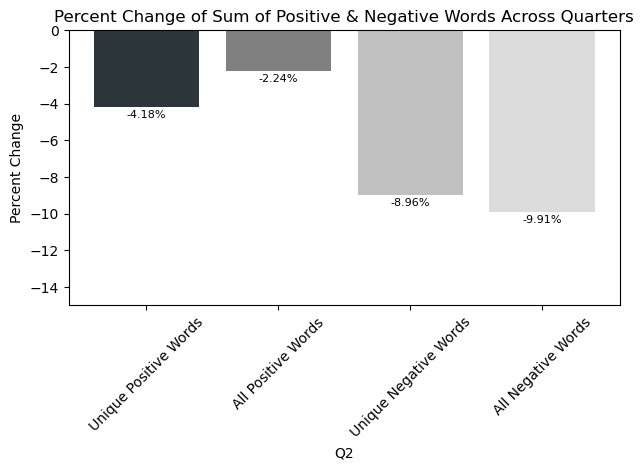

In [387]:
# Data for Q2
labels = ['Unique Positive Words', 'All Positive Words', 'Unique Negative Words', 'All Negative Words']
percent_changes = [round((sum(pos_unique2)-sum(pos_unique1))/sum(pos_unique1)*100,2),
                   round((sum(pos_total2)-sum(pos_total1))/sum(pos_total1)*100,2),
                   round((sum(neg_unique2)-sum(neg_unique1))/sum(neg_unique1)*100,2),
                   round((sum(neg_total2)-sum(neg_total1))/sum(neg_total1)*100,2)]

# Create a bar chart
plt.bar(labels, percent_changes, color=['#2C3539', '#808080', '#C0C0C0', '#DCDCDC'])

# Adding labels and title
plt.xlabel('Q2')
plt.ylabel('Percent Change')
plt.title('Percent Change of Sum of Positive & Negative Words Across Quarters')
plt.xticks(rotation=45)
plt.ylim([-15, 0])  # Set the y-axis limits to show negative values

# Adding number labels to the bars
for i, percent_change in enumerate(percent_changes):
    plt.text(i, percent_change - 0.6, f"{percent_change}%", fontsize=8, color='black', ha='center')

# Displaying the bar chart
plt.tight_layout()
plt.show()

In [365]:
#Average numbers across all earning calls for positive & negative words
print('Average Number of Unique Positive Words (Q1):', round(sum(pos_unique1)/len(pos_unique1),2))
print('Average Number of All Positive Words (Q1):', round(sum(pos_total1)/len(pos_total1),2))
print('Average Number of Unique Negative Words (Q1):', round(sum(neg_unique1)/len(neg_unique1),2))
print('Average Number of All Negative Words (Q1):', round(sum(neg_total1)/len(neg_total1),2))
print('Average Number of Unique Positive Words (Q2):', round(sum(pos_unique2)/len(pos_unique2),2))
print('Average Number of All Positive Words (Q2):', round(sum(pos_total2)/len(pos_total2),2))
print('Average Number of Unique Negative Words (Q2):', round(sum(neg_unique2)/len(neg_unique2),2))
print('Average Number of All Negative Words (Q2):', round(sum(neg_total2)/len(neg_total2),2))

Average Number of Unique Positive Words (Q1): 97.0
Average Number of All Positive Words (Q1): 267.67
Average Number of Unique Negative Words (Q1): 42.78
Average Number of All Negative Words (Q1): 94.22
Average Number of Unique Positive Words (Q2): 92.94
Average Number of All Positive Words (Q2): 261.67
Average Number of Unique Negative Words (Q2): 38.94
Average Number of All Negative Words (Q2): 84.89


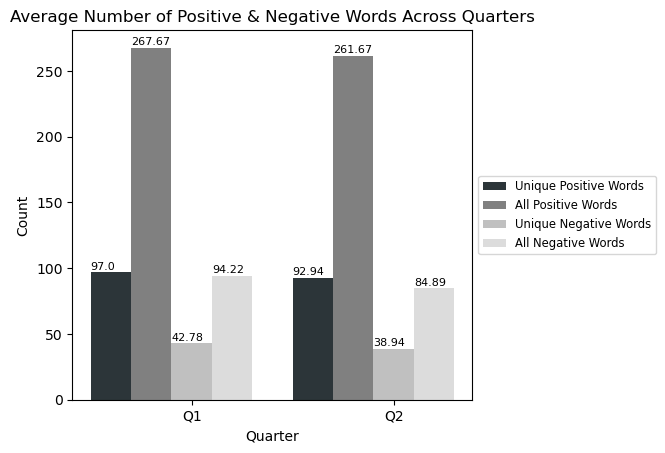

In [372]:
# Data
quarters = ['Q1', 'Q2']
unique_pos_avg = [round(sum(pos_unique1)/len(pos_unique1),2), round(sum(pos_unique2)/len(pos_unique2),2)]
all_pos_avg = [round(sum(pos_total1)/len(pos_total1),2), round(sum(pos_total2)/len(pos_total2),2)]
unique_neg_avg = [round(sum(neg_unique1)/len(neg_unique1),2), round(sum(neg_unique2)/len(neg_unique2),2)]
all_neg_avg = [round(sum(neg_total1)/len(neg_total1),2), round(sum(neg_total2)/len(neg_total2),2)]

# Set the positions and width for the bars
positions = np.arange(len(quarters))
bar_width = 0.2

# Create the grouped bar graph
plt.bar(positions - bar_width, unique_pos_avg, bar_width, label='Unique Positive Words', color='#2C3539')
plt.bar(positions, all_pos_avg, bar_width, label='All Positive Words', color='#808080')
plt.bar(positions + bar_width, unique_neg_avg, bar_width, label='Unique Negative Words', color='#C0C0C0')
plt.bar(positions + 2 * bar_width, all_neg_avg, bar_width, label='All Negative Words', color='#DCDCDC')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Average Number of Positive & Negative Words Across Quarters')
plt.xticks(positions + bar_width, quarters)
plt.legend()

# Adding number labels to the bars
for i in range(len(quarters)):
    plt.text(positions[i] - 0.3, unique_pos_avg[i] + 2, str(unique_pos_avg[i]), fontsize=8)
    plt.text(positions[i] - 0.1, all_pos_avg[i] + 2, str(all_pos_avg[i]), fontsize=8)
    plt.text(positions[i] + 0.1, unique_neg_avg[i] + 2, str(unique_neg_avg[i]), fontsize=8)
    plt.text(positions[i] + 0.3, all_neg_avg[i] + 2, str(all_neg_avg[i]), fontsize=8)

# Move the legend to the side of the graph without changing graph size
plt.legend(loc='center left',fontsize='small',bbox_to_anchor=(1, 0.5))

# Displaying the bar graph
plt.subplots_adjust(right=0.75)  # Adjust right margin for legend
plt.show()

In [367]:
#Percentages across all earning calls for positive & negative words
print('Average Percentage of Positive Words (Q1):', round(sum(pos_per1)/len(pos_per1),2))
print('Average Percentage of Negative Words (Q1):', round(sum(neg_per1)/len(neg_per1),2))
print('Average Percentage of Positive Words (Q2):', round(sum(pos_per2)/len(pos_per2),2))
print('Average Percentage of Negative Words (Q2):', round(sum(neg_per2)/len(neg_per2),2))

Average Percentage of Positive Words (Q1): 5.61
Average Percentage of Negative Words (Q1): 1.95
Average Percentage of Positive Words (Q2): 5.51
Average Percentage of Negative Words (Q2): 1.78


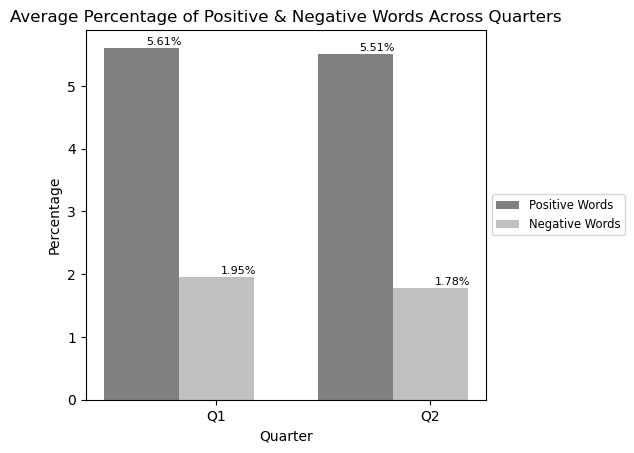

In [368]:
# Data
quarters = ['Q1', 'Q2']
pos_per_avg = [round(sum(pos_per1)/len(pos_per1),2), round(sum(pos_per2)/len(pos_per2),2)]
neg_per_avg = [round(sum(neg_per1)/len(neg_per1),2), round(sum(neg_per2)/len(neg_per2),2)]

# Set the positions and width for the bars
positions = range(len(quarters))
bar_width = 0.35

# Create the grouped bar graph
plt.bar(positions, pos_per_avg, bar_width, label='Positive Words', color='#808080')
plt.bar([pos + bar_width for pos in positions], neg_per_avg, bar_width, label='Negative Words', color='#C0C0C0')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.title('Average Percentage of Positive & Negative Words Across Quarters')
plt.xticks([pos + bar_width for pos in positions], quarters)

# Adding number labels to the bars
for i in range(len(quarters)):
    plt.text(positions[i] + 0.02, pos_per_avg[i] + 0.05, f"{pos_per_avg[i]}%", fontsize=8, color='black')
    plt.text(positions[i] + bar_width + 0.02, neg_per_avg[i] + 0.05, f"{neg_per_avg[i]}%", fontsize=8, color='black')
    
# Move the legend to the side of the graph without changing graph size
plt.legend(loc='center left',fontsize='small',bbox_to_anchor=(1, 0.5))

# Displaying the bar graph
plt.subplots_adjust(right=0.75)  # Adjust right margin for legend
plt.show()

In [442]:
def find_words(word_list, specific_word):
    result = []
    indices = [i for i, x in enumerate(word_list) if x == specific_word]
    for i in indices:
        result.append(word_list[max(0, i-2):min(len(word_list), i+3)])
    return result

In [443]:
#Text list with stop words
def full_transcript_list(files):
    text_list = []
    for file in files:
        text = open_file(file).split('Earnings Call\n\nPresentation')[1].replace('\n','').split('This transcript may not be 100 percent')[0].strip()
        text_list.append(word_list(text, remove_stop_words=False))
    return text_list

In [444]:
full_transcript1 = full_transcript_list(files1)
full_transcript1

[['operator',
  'good',
  'day',
  'and',
  'welcome',
  'to',
  'the',
  'alexandria',
  'real',
  'estate',
  'equity',
  'first',
  'quarter',
  'conference',
  'call',
  'all',
  'participant',
  'will',
  'be',
  'in',
  'a',
  'listenonly',
  'mode',
  'operator',
  'instruction',
  'please',
  'note',
  'this',
  'event',
  'is',
  'being',
  'recorded',
  'i',
  'would',
  'now',
  'like',
  'to',
  'turn',
  'the',
  'conference',
  'over',
  'to',
  'paula',
  'schwartz',
  'with',
  'investor',
  'relation',
  'please',
  'go',
  'ahead',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'thank',
  'you',
  'and',
  'good',
  'afternoon',
  'everyone',
  'this',
  'conference',
  'call',
  'contains',
  'forwardlooking',
  'statement',
  'within',
  'the',
  'meaning',
  'of',
  'the',
  'federal',
  'security',
  'law',
  'the',
  'company',
  'actual',
  'result',
  'might',
  'differ',
  'materially',
  'from',
  'those',
  'projected',
  'in',
  'the',
  'forwardloo

In [445]:
full_transcript2 = full_transcript_list(files2)
full_transcript2

[['operator',
  'good',
  'day',
  'and',
  'welcome',
  'to',
  'the',
  'alexandria',
  'real',
  'estate',
  'equity',
  'second',
  'quarter',
  'conference',
  'call',
  'all',
  'participant',
  'will',
  'be',
  'in',
  'a',
  'listenonly',
  'mode',
  'operator',
  'instruction',
  'after',
  'today',
  'presentation',
  'there',
  'will',
  'be',
  'an',
  'opportunity',
  'to',
  'ask',
  'question',
  'operator',
  'instruction',
  'please',
  'note',
  'today',
  'event',
  'is',
  'being',
  'recorded',
  'i',
  'would',
  'now',
  'like',
  'to',
  'turn',
  'the',
  'conference',
  'over',
  'to',
  'paula',
  'schwartz',
  'with',
  'investor',
  'relation',
  'please',
  'go',
  'ahead',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'thank',
  'you',
  'and',
  'good',
  'afternoon',
  'everyone',
  'this',
  'conference',
  'call',
  'contains',
  'forwardlooking',
  'statement',
  'within',
  'the',
  'meaning',
  'of',
  'the',
  'federal',
  'security',
  

In [446]:
#List of key words that appear
def key_words_list(unique, index):
    w = []
    for word in unique:
        w.append(word[index])
    word = {k: v for k, v in zip(common_names, w)}
    find_word = []
    for i in range(len(common_names)):
        find_word.append(list(word.values())[i])
    return find_word

In [447]:
pos_list1 = key_words_list(unique1, 0)
pos_list1

[{'abundance',
  'advanced',
  'advantage',
  'amazing',
  'ambitious',
  'appreciable',
  'appreciate',
  'appreciated',
  'approval',
  'astounding',
  'attractive',
  'available',
  'award',
  'benefit',
  'best',
  'better',
  'capability',
  'clear',
  'clearly',
  'comfortable',
  'competitive',
  'confidence',
  'consistent',
  'contribution',
  'cornerstone',
  'correct',
  'decent',
  'deference',
  'diligence',
  'distinction',
  'diversified',
  'easy',
  'engaging',
  'enjoyed',
  'enough',
  'exceeded',
  'excellence',
  'excellent',
  'exceptional',
  'extraordinarily',
  'extraordinary',
  'fair',
  'fairly',
  'fantastic',
  'fast',
  'flexibility',
  'fortunate',
  'free',
  'gain',
  'good',
  'great',
  'guidance',
  'healthy',
  'helpful',
  'important',
  'impressed',
  'improve',
  'improved',
  'improvement',
  'innovation',
  'innovative',
  'integrated',
  'interesting',
  'judicious',
  'lead',
  'leading',
  'leverage',
  'liked',
  'loyalty',
  'maturity',
 

In [448]:
neg_list1 = key_words_list(unique1, 2)
neg_list1

[{'abuse',
  'aggressive',
  'bad',
  'break',
  'broken',
  'cancer',
  'challenging',
  'chronic',
  'cloud',
  'collapse',
  'concerned',
  'conservative',
  'contend',
  'crisis',
  'critical',
  'debt',
  'delay',
  'delaying',
  'desperation',
  'difficult',
  'difficulty',
  'discriminate',
  'expensive',
  'fabrication',
  'fail',
  'failure',
  'falling',
  'gross',
  'hard',
  'havoc',
  'heck',
  'illness',
  'inefficiency',
  'instability',
  'issue',
  'lack',
  'limit',
  'limited',
  'lost',
  'lumpy',
  'missed',
  'nervous',
  'onerous',
  'reckless',
  'risk',
  'shortage',
  'sickness',
  'slowed',
  'slower',
  'solemn',
  'sorry',
  'stall',
  'suspect',
  'trouble',
  'unable',
  'unusual',
  'vice',
  'volatile',
  'volatility',
  'waste',
  'weakness',
  'worse'},
 {'breaking',
  'bulky',
  'challenging',
  'cheap',
  'complex',
  'crisis',
  'critical',
  'dearth',
  'debt',
  'declining',
  'demolish',
  'difficult',
  'excuse',
  'failure',
  'false',
  'fear

In [449]:
pos_list2 = key_words_list(unique2, 0)
pos_list2

[{'accomplishment',
  'achievement',
  'adequate',
  'advantage',
  'affirmation',
  'afford',
  'amazingly',
  'amenity',
  'appreciate',
  'approval',
  'astounding',
  'attractive',
  'available',
  'award',
  'awarded',
  'benefit',
  'best',
  'better',
  'bolster',
  'clear',
  'clearly',
  'comfort',
  'comfortable',
  'commitment',
  'competitive',
  'complementary',
  'concise',
  'confidence',
  'confident',
  'congratulation',
  'consistent',
  'consistently',
  'contribution',
  'correct',
  'cure',
  'diligence',
  'dynamic',
  'effective',
  'effectively',
  'enhance',
  'enhancement',
  'enough',
  'exceed',
  'exceeded',
  'excellence',
  'excellent',
  'excited',
  'extraordinarily',
  'fair',
  'favorable',
  'feat',
  'flexibility',
  'flexible',
  'fortunate',
  'gain',
  'gold',
  'golden',
  'good',
  'great',
  'groundbreaking',
  'guidance',
  'happy',
  'healthy',
  'helpful',
  'immense',
  'important',
  'improve',
  'improvement',
  'improving',
  'incredibl

In [450]:
neg_list2 = key_words_list(unique2, 2)
neg_list2

[{'attack',
  'awfully',
  'breakdown',
  'breaking',
  'burning',
  'challenging',
  'complication',
  'concession',
  'confusion',
  'conservative',
  'creeping',
  'crisis',
  'critical',
  'dearth',
  'debilitating',
  'debt',
  'decline',
  'delaying',
  'desperate',
  'died',
  'disorder',
  'enemy',
  'fail',
  'failed',
  'failure',
  'fall',
  'gross',
  'inaudible',
  'issue',
  'lack',
  'lacking',
  'negative',
  'overdo',
  'proprietary',
  'scarce',
  'slow',
  'slower',
  'sorry',
  'split',
  'struggling',
  'unusual',
  'vice',
  'weakening',
  'weird',
  'weirdly',
  'wrong'},
 {'aggressive',
  'anomaly',
  'break',
  'breaking',
  'challenging',
  'concession',
  'crisis',
  'critical',
  'dearth',
  'debt',
  'declining',
  'delay',
  'delayed',
  'difficult',
  'difficulty',
  'disappointing',
  'divergent',
  'downturn',
  'expensive',
  'expire',
  'gross',
  'hard',
  'heck',
  'hedge',
  'inaudible',
  'issue',
  'lack',
  'limit',
  'limited',
  'loser',
  'lo

In [451]:
def five_words_list(list_, transcript):
    d = {}
    for n, s, t in zip(common_names, list_, transcript):
        l = []
        for w in s:
            l.extend(find_words(t, w))
        d[n] = l
    return d

In [452]:
five_words_list(pos_list1, full_transcript1)

{'are': [['attract', 'a', 'diversified', 'bestinclass', 'tenant'],
  ['a', 'very', 'solid', 'first', 'quarter'],
  ['had', 'very', 'solid', 'leasing', 'with'],
  ['to', 'drive', 'solid', 'leasing', 'even'],
  ['towards', 'a', 'solid', 'growth', 'for'],
  ['not', 'to', 'win', 'the', 'britannia'],
  ['ha', 'slightly', 'improved', 'but', 'their'],
  ['warrant', 'extreme', 'prudence', 'it', 'is'],
  ['warrant', 'extreme', 'prudence', 'however', 'were'],
  ['no', 'debt', 'maturity', 'until', 'our'],
  ['at', 'a', 'fast', 'clip', 'yeartodate'],
  ['of', 'how', 'fast', 'time', 'move'],
  ['a', 'long', 'successful', 'track', 'record'],
  ['of', 'our', 'top', 'tenant', 'are'],
  ['huge', 'competitive', 'advantage', 'and', 'landed'],
  ['and', 'significant', 'free', 'cash', 'flow'],
  ['of', 'some', 'free', 'rent', 'our'],
  ['know', 'the', 'rapid', 'rise', 'in'],
  ['tenant', 'are', 'engaging', 'le', 'on'],
  ['day', 'and', 'welcome', 'to', 'the'],
  ['paula', 'and', 'welcome', 'everybody', 'to

In [453]:
five_words_list(neg_list1, full_transcript1)

{'are': [['me', 'both', 'nervous', 'a', 'nobody'],
  ['driving', 'these', 'delay', 'are', 'chip'],
  ['with', 'these', 'delay', 'and', 'associated'],
  ['is', 'fairly', 'reckless', 'investing', 'joel'],
  ['result', 'in', 'aggressive', 'form', 'of'],
  ['wa', 'a', 'heck', 'of', 'an'],
  ['mental', 'health', 'crisis', 'is', 'continuing'],
  ['a', 'good', 'crisis', 'go', 'to'],
  ['to', 'minimize', 'limit', 'our', 'exposure'],
  ['if', 'i', 'missed', 'it', 'but'],
  ['cost', 'of', 'sickness', 'illness', 'and'],
  ['they', 'remain', 'volatile', 'but', 'are'],
  ['of', 'sickness', 'illness', 'and', 'today'],
  ['and', 'mental', 'illness', 'are', 'not'],
  ['is', 'inheritedly', 'limited', 'we', 'focus'],
  ['have', 'very', 'limited', 'exposure', 'there'],
  ['in', 'im', 'sorry', 'the', 'redevelopment'],
  ['to', 'the', 'difficulty', 'to', 'execute'],
  ['not', 'be', 'broken', 'out', 'or'],
  ['we', 'havent', 'broken', 'out', 'that'],
  ['development', 'or', 'lack', 'thereof', 'take'],
  ['d

In [454]:
five_words_list(pos_list2, full_transcript2)

{'are': [['occupancy', 'and', 'solid', 'samestore', 'noi'],
  ['on', 'the', 'solid', 'fundamental', 'of'],
  ['science', 'industry', 'solid', 'fundamental', 'and'],
  ['reported', 'very', 'solid', 'operating', 'and'],
  ['generate', 'another', 'solid', 'year', 'of'],
  ['wa', 'very', 'solid', 'and', 'in'],
  ['remains', 'very', 'solid', 'at', 'a'],
  ['space', 'remains', 'solid', 'at', 'the'],
  ['very', 'very', 'solid', 'workhorse', 'asset'],
  ['asset', 'in', 'solid', 'location', 'with'],
  ['location', 'with', 'solid', 'tenant', 'and'],
  ['and', 'with', 'solid', 'cash', 'flow'],
  ['warrant', 'extreme', 'prudence', 'it', 'is'],
  ['financing', 'and', 'adequate', 'supply', 'currently'],
  ['on', 'the', 'successful', 'expansion', 'of'],
  ['after', 'our', 'successful', 'leaseup', 'of'],
  ['after', 'our', 'successful', 'leaseup', 'of'],
  ['of', 'the', 'top', 'multinational', 'biopharmas'],
  ['in', 'our', 'top', 'three', 'market'],
  ['in', 'our', 'top', 'three', 'market'],
  ['and'

In [455]:
five_words_list(neg_list2, full_transcript2)

{'are': [['and', 'the', 'complication', 'of', 'work'],
  ['kind', 'of', 'weirdly', 'enough', 'a'],
  ['certainly', 'no', 'dearth', 'of', 'investment'],
  ['debilitating', 'neurodegenerative', 'disorder', 'lacking', 'current'],
  ['have', 'a', 'breakdown', 'with', 'what'],
  ['have', 'the', 'breakdown', 'of', 'each'],
  ['great', 'financial', 'crisis', 'when', 'we'],
  ['expenditure', 'generally', 'fall', 'into', 'two'],
  ['developer', 'start', 'breaking', 'ground', 'on'],
  ['anything', 'new', 'breaking', 'ground', 'but'],
  ['with', 'grail', 'sorry', 'illumina', 'acquiring'],
  ['in', 'a', 'scarce', 'asset', 'class'],
  ['al', 'a', 'debilitating', 'neurodegenerative', 'treatment'],
  ['lacking', 'a', 'debilitating', 'neurodegenerative', 'disorder'],
  ['of', 'capital', 'lack', 'of', 'available'],
  ['always', 'clinical', 'failure', 'in', 'all'],
  ['manifested', 'by', 'slower', 'decisionmaking', 'and'],
  ['is', 'a', 'slower', 'allocation', 'and'],
  ['low', 'and', 'conservative', 'f

In [456]:
def opposite_meaning(word_dict, word_list):
    result = {}
    for key, value in word_dict.items():
        for list_ in value:
            for word in list_:
                if word.lower() in word_list:
                    if len(list_) >= 3:
                        result.setdefault(key, []).append((list_[2], word))
                        break  
    return result

In [457]:
find_pos_words = ['not', 'isnt', 'hasnt', 'cant', 'cannot', 'no', 'bad', 'badly']

In [458]:
find_neg_words = ['not', 'isnt', 'hasnt', 'cant', 'cannot', 'no']

In [459]:
p1 = opposite_meaning(five_words_list(pos_list1, full_transcript1), find_pos_words)
p1

{'are': [('win', 'not'),
  ('maturity', 'no'),
  ('helpful', 'no'),
  ('significant', 'no'),
  ('work', 'not'),
  ('great', 'no'),
  ('appreciable', 'not')],
 'bxp': [('assurance', 'no'), ('competitive', 'not')],
 'cold': [('efficiently', 'not'), ('guidance', 'not'), ('guidance', 'not')],
 'cuz': [('maturity', 'not'),
  ('well', 'not'),
  ('significant', 'no'),
  ('significant', 'not')],
 'dlr': [('top', 'not'), ('appreciate', 'no'), ('meaningful', 'not')],
 'eqix': [('maturity', 'no'), ('meaningful', 'no')],
 'eqr': [('good', 'not'),
  ('good', 'not'),
  ('significant', 'no'),
  ('guidance', 'not'),
  ('promising', 'not')],
 'exr': [('efficiently', 'not'),
  ('good', 'isnt'),
  ('helpful', 'no'),
  ('enough', 'cant')],
 'hr': [('contribution', 'no'), ('work', 'no'), ('reconcile', 'cant')],
 'invh': [('regard', 'bad'), ('great', 'isnt')],
 'kim': [('benefit', 'no'), ('resilient', 'not')],
 'krc': [('accomplished', 'not'),
  ('maturity', 'no'),
  ('appreciate', 'no'),
  ('significant', 

In [460]:
n1 = opposite_meaning(five_words_list(neg_list1, full_transcript1), find_neg_words)
n1

{'are': [('illness', 'not'),
  ('broken', 'not'),
  ('fail', 'no'),
  ('fail', 'not'),
  ('fail', 'not'),
  ('concerned', 'not'),
  ('debt', 'no'),
  ('lumpy', 'not')],
 'cold': [('unfortunately', 'cant'), ('concerned', 'not')],
 'cuz': [('rejected', 'not'), ('debt', 'no'), ('dead', 'not')],
 'dlr': [('alienate', 'not'), ('implication', 'not')],
 'eqix': [('worried', 'not'), ('suffer', 'not')],
 'eqr': [('layoff', 'isnt'), ('downside', 'not')],
 'exr': [('problem', 'no'), ('restrict', 'not')],
 'invh': [('doubt', 'no'), ('bad', 'not'), ('debt', 'no'), ('debt', 'not')],
 'krc': [('doubt', 'no'), ('slowed', 'no'), ('debt', 'no')],
 'maa': [('doubt', 'no'), ('concession', 'no')],
 'o': [('debt', 'no')],
 'pld': [('losing', 'not'),
  ('hard', 'not'),
  ('hard', 'not'),
  ('falling', 'not'),
  ('worried', 'not'),
  ('worried', 'not'),
  ('concern', 'not'),
  ('unusual', 'not')],
 'reg': [('inaudible', 'no'),
  ('debt', 'no'),
  ('afraid', 'not'),
  ('afraid', 'not'),
  ('risky', 'not')],
 '

In [461]:
p2 = opposite_meaning(five_words_list(pos_list2, full_transcript2), find_pos_words)
p2

{'are': [('good', 'no'),
  ('integral', 'no'),
  ('guidance', 'not'),
  ('guidance', 'not'),
  ('clearly', 'not'),
  ('flexibility', 'not')],
 'bxp': [('smart', 'not'),
  ('better', 'not'),
  ('assurance', 'no'),
  ('enough', 'not'),
  ('available', 'not'),
  ('available', 'no'),
  ('easy', 'not'),
  ('appropriate', 'not'),
  ('premier', 'no'),
  ('competitive', 'not')],
 'cold': [('competitive', 'not'), ('guidance', 'not')],
 'cuz': [('maturity', 'no'),
  ('maturity', 'not'),
  ('willing', 'not'),
  ('guidance', 'no'),
  ('guidance', 'not'),
  ('enough', 'not'),
  ('enough', 'not'),
  ('effective', 'no'),
  ('improvement', 'no')],
 'dlr': [('appreciate', 'no')],
 'eqix': [('well', 'cant'), ('sustainability', 'not')],
 'eqr': [('well', 'not'),
  ('significant', 'not'),
  ('helping', 'bad'),
  ('outperform', 'not'),
  ('guidance', 'not'),
  ('enough', 'not'),
  ('competitive', 'not'),
  ('great', 'no'),
  ('great', 'not'),
  ('improve', 'bad'),
  ('improvement', 'bad'),
  ('best', 'not'

In [462]:
n2 = opposite_meaning(five_words_list(neg_list2, full_transcript2), find_neg_words)
n2

{'are': [('dearth', 'no')],
 'bxp': [('worse', 'not')],
 'cuz': [('obsolete', 'not'), ('dead', 'not'), ('wrong', 'not')],
 'eqix': [('hedge', 'not')],
 'eqr': [('compulsion', 'no'), ('concerned', 'not'), ('debt', 'no')],
 'exr': [('negative', 'cant')],
 'hr': [('declining', 'not'), ('critical', 'not')],
 'kim': [('anomaly', 'no'), ('shortage', 'no')],
 'krc': [('addict', 'not')],
 'maa': [('distress', 'not'), ('bad', 'not'), ('unusual', 'not')],
 'o': [('strike', 'not'), ('risk', 'not')],
 'pld': [('tank', 'not'),
  ('difficult', 'no'),
  ('unusual', 'not'),
  ('unusually', 'not')],
 'psa': [('problem', 'no')],
 'reg': [('limited', 'not'),
  ('sorry', 'no'),
  ('doubt', 'no'),
  ('bad', 'no'),
  ('stress', 'cant'),
  ('boring', 'no')],
 'vtr': [('issue', 'not')]}

In [463]:
def count_opposite_words(word_dict):
    result = {}
    for key, value in word_dict.items():
        count = {}
        for first, second in value:
            count[second] = count.get(second, 0) + 1
        result[key] = count
    return result

In [464]:
p3 = count_opposite_words(p1)
p3

{'are': {'not': 3, 'no': 4},
 'bxp': {'no': 1, 'not': 1},
 'cold': {'not': 3},
 'cuz': {'not': 3, 'no': 1},
 'dlr': {'not': 2, 'no': 1},
 'eqix': {'no': 2},
 'eqr': {'not': 4, 'no': 1},
 'exr': {'not': 1, 'isnt': 1, 'no': 1, 'cant': 1},
 'hr': {'no': 2, 'cant': 1},
 'invh': {'bad': 1, 'isnt': 1},
 'kim': {'no': 1, 'not': 1},
 'krc': {'not': 2, 'no': 4, 'cant': 1},
 'maa': {'not': 4},
 'pld': {'not': 5, 'bad': 1, 'isnt': 1},
 'psa': {'not': 1},
 'reg': {'not': 4, 'no': 3, 'cant': 1, 'bad': 1}}

In [465]:
n3 = count_opposite_words(n1)
n3

{'are': {'not': 6, 'no': 2},
 'cold': {'cant': 1, 'not': 1},
 'cuz': {'not': 2, 'no': 1},
 'dlr': {'not': 2},
 'eqix': {'not': 2},
 'eqr': {'isnt': 1, 'not': 1},
 'exr': {'no': 1, 'not': 1},
 'invh': {'no': 2, 'not': 2},
 'krc': {'no': 3},
 'maa': {'no': 2},
 'o': {'no': 1},
 'pld': {'not': 8},
 'reg': {'no': 2, 'not': 3},
 'vtr': {'not': 1}}

In [466]:
p4 = count_opposite_words(p2)
p4

{'are': {'no': 2, 'not': 4},
 'bxp': {'not': 7, 'no': 3},
 'cold': {'not': 2},
 'cuz': {'no': 4, 'not': 5},
 'dlr': {'no': 1},
 'eqix': {'cant': 1, 'not': 1},
 'eqr': {'not': 8, 'bad': 3, 'no': 1},
 'exr': {'not': 8},
 'invh': {'not': 3, 'cant': 1},
 'krc': {'not': 3, 'bad': 1, 'no': 1, 'isnt': 1},
 'maa': {'not': 2, 'no': 1},
 'o': {'not': 4, 'cant': 1},
 'pld': {'not': 8, 'no': 1},
 'psa': {'no': 1},
 'reg': {'no': 1, 'bad': 2, 'cant': 1, 'not': 1},
 'vtr': {'not': 2}}

In [467]:
n4 = count_opposite_words(n2)
n4

{'are': {'no': 1},
 'bxp': {'not': 1},
 'cuz': {'not': 3},
 'eqix': {'not': 1},
 'eqr': {'no': 2, 'not': 1},
 'exr': {'cant': 1},
 'hr': {'not': 2},
 'kim': {'no': 2},
 'krc': {'not': 1},
 'maa': {'not': 3},
 'o': {'not': 2},
 'pld': {'not': 3, 'no': 1},
 'psa': {'no': 1},
 'reg': {'not': 1, 'no': 4, 'cant': 1},
 'vtr': {'not': 1}}

In [468]:
opp_pos1 = []
for tup in p1.values():
    for first, second in tup:
        opp_pos1.append(first)
dict(sorted(Counter(opp_pos1).items(), key=lambda x: (-x[1], x[0])))

{'significant': 8,
 'maturity': 4,
 'appreciate': 3,
 'good': 3,
 'great': 3,
 'guidance': 3,
 'helpful': 3,
 'meaningful': 3,
 'clearly': 2,
 'efficiently': 2,
 'promising': 2,
 'regard': 2,
 'work': 2,
 'accomplished': 1,
 'appreciable': 1,
 'assurance': 1,
 'benefit': 1,
 'better': 1,
 'competitive': 1,
 'confident': 1,
 'contribution': 1,
 'enough': 1,
 'exceptional': 1,
 'excited': 1,
 'free': 1,
 'guarantee': 1,
 'healthy': 1,
 'improve': 1,
 'reconcile': 1,
 'resilient': 1,
 'stability': 1,
 'strong': 1,
 'success': 1,
 'thank': 1,
 'top': 1,
 'well': 1,
 'win': 1,
 'worth': 1}

In [469]:
opp_neg1 = []
for tup in n1.values():
    for first, second in tup:
        opp_neg1.append(first)
dict(sorted(Counter(opp_neg1).items(), key=lambda x: (-x[1], x[0])))

{'debt': 7,
 'doubt': 3,
 'fail': 3,
 'worried': 3,
 'afraid': 2,
 'concerned': 2,
 'hard': 2,
 'alienate': 1,
 'bad': 1,
 'broken': 1,
 'concern': 1,
 'concession': 1,
 'dead': 1,
 'disruptive': 1,
 'downside': 1,
 'falling': 1,
 'illness': 1,
 'implication': 1,
 'inaudible': 1,
 'layoff': 1,
 'losing': 1,
 'lumpy': 1,
 'problem': 1,
 'rejected': 1,
 'restrict': 1,
 'risky': 1,
 'slowed': 1,
 'suffer': 1,
 'unfortunately': 1,
 'unusual': 1}

In [470]:
opp_pos2 = []
for tup in p2.values():
    for first, second in tup:
        opp_pos2.append(first)
dict(sorted(Counter(opp_pos2).items(), key=lambda x: (-x[1], x[0])))

{'enough': 9,
 'guidance': 9,
 'available': 3,
 'better': 3,
 'competitive': 3,
 'good': 3,
 'maturity': 3,
 'significant': 3,
 'well': 3,
 'contribution': 2,
 'easy': 2,
 'great': 2,
 'improve': 2,
 'improvement': 2,
 'smart': 2,
 'sufficient': 2,
 'appreciate': 1,
 'appropriate': 1,
 'assurance': 1,
 'benefit': 1,
 'best': 1,
 'clearly': 1,
 'comprehensive': 1,
 'dynamic': 1,
 'effective': 1,
 'flexibility': 1,
 'gain': 1,
 'gained': 1,
 'guarantee': 1,
 'healthy': 1,
 'helpful': 1,
 'helping': 1,
 'improved': 1,
 'instantly': 1,
 'integral': 1,
 'luck': 1,
 'outperform': 1,
 'premier': 1,
 'proactive': 1,
 'progress': 1,
 'robust': 1,
 'strong': 1,
 'sustainability': 1,
 'thank': 1,
 'tough': 1,
 'tougher': 1,
 'willing': 1,
 'wise': 1}

In [471]:
opp_neg2 = []
for tup in n2.values():
    for first, second in tup:
        opp_neg2.append(first)
dict(sorted(Counter(opp_neg2).items(), key=lambda x: (-x[1], x[0])))

{'bad': 2,
 'unusual': 2,
 'addict': 1,
 'anomaly': 1,
 'boring': 1,
 'compulsion': 1,
 'concerned': 1,
 'critical': 1,
 'dead': 1,
 'dearth': 1,
 'debt': 1,
 'declining': 1,
 'difficult': 1,
 'distress': 1,
 'doubt': 1,
 'hedge': 1,
 'issue': 1,
 'limited': 1,
 'negative': 1,
 'obsolete': 1,
 'problem': 1,
 'risk': 1,
 'shortage': 1,
 'sorry': 1,
 'stress': 1,
 'strike': 1,
 'tank': 1,
 'unusually': 1,
 'worse': 1,
 'wrong': 1}

In [472]:
def opp_words_per_call(dict_):
    d = {}
    for key, value in dict_.items():
        d[key] = sum(value.values())
    return d

In [894]:
def key_opp_words_graph(dict_, title):    
    # Sort the data in descending order by values
    sorted_data = dict(sorted(dict_.items(), key=lambda item: item[1], reverse=False))

    # Extract sorted keys and values from the sorted data
    names2 = list(sorted_data.keys())
    values = list(sorted_data.values())

    # Plotting the horizontal bar graph
    plt.barh(names2, values, color='gray')

    # Adding labels and title
    plt.xlabel('Frequency')
    plt.ylabel('Earnings Call')
    plt.title(title)

    # Add number labels to the bars
    for index, value in enumerate(values):
        plt.text(value, index, str(value), ha='left', va='center')

    # Displaying the bar graph
    plt.tight_layout()
    plt.show()

In [485]:
opp_words_per_call(p3)

{'are': 7,
 'bxp': 2,
 'cold': 3,
 'cuz': 4,
 'dlr': 3,
 'eqix': 2,
 'eqr': 5,
 'exr': 4,
 'hr': 3,
 'invh': 2,
 'kim': 2,
 'krc': 7,
 'maa': 4,
 'pld': 7,
 'psa': 1,
 'reg': 9}

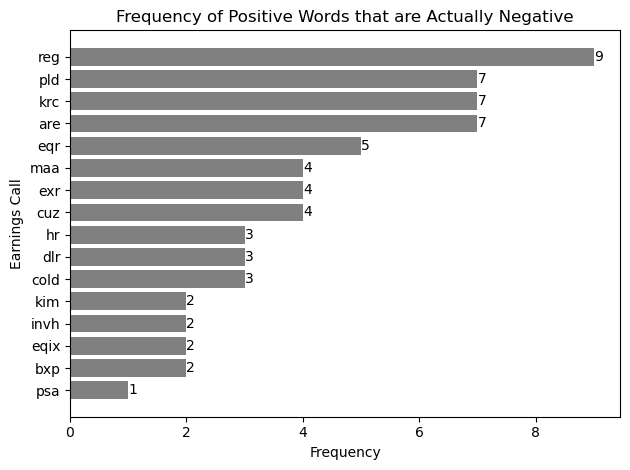

In [895]:
key_opp_words_graph(opp_words_per_call(p3), 'Frequency of Positive Words that are Actually Negative')

In [474]:
opp_words_per_call(n3)

{'are': 8,
 'cold': 2,
 'cuz': 3,
 'dlr': 2,
 'eqix': 2,
 'eqr': 2,
 'exr': 2,
 'invh': 4,
 'krc': 3,
 'maa': 2,
 'o': 1,
 'pld': 8,
 'reg': 5,
 'vtr': 1}

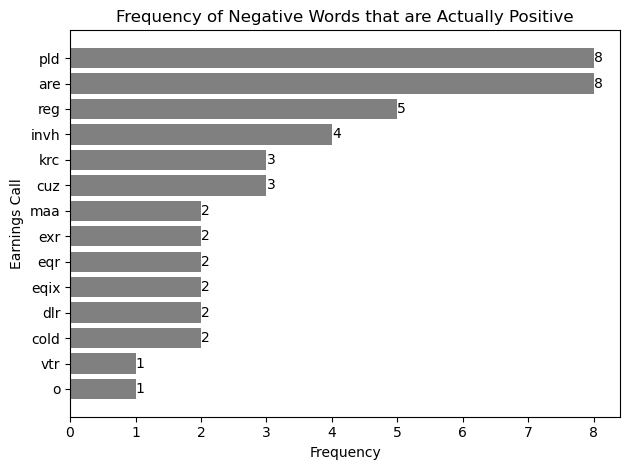

In [896]:
key_opp_words_graph(opp_words_per_call(n3), 'Frequency of Negative Words that are Actually Positive')

In [475]:
opp_words_per_call(p4)

{'are': 6,
 'bxp': 10,
 'cold': 2,
 'cuz': 9,
 'dlr': 1,
 'eqix': 2,
 'eqr': 12,
 'exr': 8,
 'invh': 4,
 'krc': 6,
 'maa': 3,
 'o': 5,
 'pld': 9,
 'psa': 1,
 'reg': 5,
 'vtr': 2}

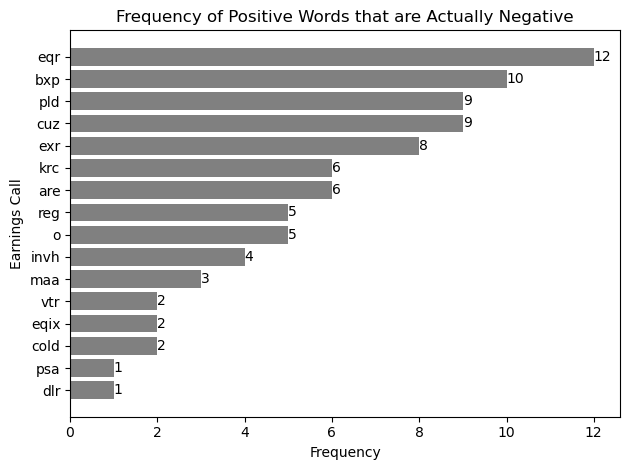

In [897]:
key_opp_words_graph(opp_words_per_call(p4), 'Frequency of Positive Words that are Actually Negative')

In [476]:
opp_words_per_call(n4)

{'are': 1,
 'bxp': 1,
 'cuz': 3,
 'eqix': 1,
 'eqr': 3,
 'exr': 1,
 'hr': 2,
 'kim': 2,
 'krc': 1,
 'maa': 3,
 'o': 2,
 'pld': 4,
 'psa': 1,
 'reg': 6,
 'vtr': 1}

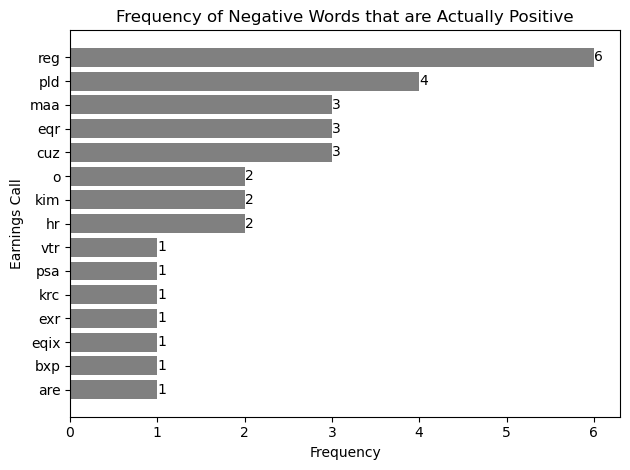

In [898]:
key_opp_words_graph(opp_words_per_call(n4), 'Frequency of Negative Words that are Actually Positive')

In [492]:
print(sum(dict(sorted(Counter(opp_pos1).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(p3).values()))
print(sum(dict(sorted(Counter(opp_neg1).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(n3).values()))
print(sum(dict(sorted(Counter(opp_pos2).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(p4).values()))
print(sum(dict(sorted(Counter(opp_neg2).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(n4).values()))

65
65
45
45
85
85
32
32


In [493]:
print('Total Number of Positive Words that are Actually Negative (Q1):', sum(opp_words_per_call(p3).values()))
print('Total Number of Positive Words that are Actually Negative (Q2):', sum(opp_words_per_call(p3).values()))
print('Percentage of Positive Words that are Actually Negative (Q1):', round(sum(opp_words_per_call(p3).values())/sum(pos_total1)*100, 2))
print('Percentage of Positive Words that are Actually Negative (Q2):', round(sum(opp_words_per_call(p4).values())/sum(pos_total2)*100, 2))
print('Total Number of Negative Words that are Actually Positive (Q1):', sum(opp_words_per_call(n3).values()))
print('Total Number of Negative Words that are Actually Positive (Q2):', sum(opp_words_per_call(n4).values()))
print('Percentage of Negative Words that are Actually Positive (Q1):', round(sum(opp_words_per_call(n3).values())/sum(neg_total1)*100, 2))
print('Percentage of Negative Words that are Actually Positive (Q2):', round(sum(opp_words_per_call(n4).values())/sum(neg_total2)*100, 2))

Total Number of Positive Words that are Actually Negative (Q1): 65
Total Number of Positive Words that are Actually Negative (Q2): 85
Percentage of Positive Words that are Actually Negative (Q1): 1.35
Percentage of Positive Words that are Actually Negative (Q2): 1.8
Total Number of Negative Words that are Actually Positive (Q1): 45
Total Number of Negative Words that are Actually Positive (Q2): 32
Percentage of Negative Words that are Actually Positive (Q1): 2.65
Percentage of Negative Words that are Actually Positive (Q2): 2.09


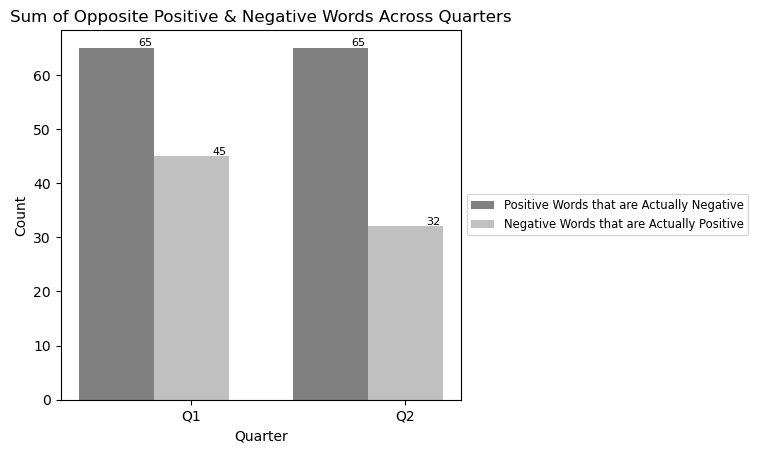

In [513]:
# Data
quarters = ['Q1', 'Q2']
pos_neg_num = [sum(opp_words_per_call(p3).values()), sum(opp_words_per_call(p3).values())]
neg_pos_num = [sum(opp_words_per_call(n3).values()), sum(opp_words_per_call(n4).values())]

# Set the positions and width for the bars
positions = range(len(quarters))
bar_width = 0.35

# Create the grouped bar graph
plt.bar(positions, pos_neg_num, bar_width, label='Positive Words that are Actually Negative', color='#808080')
plt.bar([pos + bar_width for pos in positions], neg_pos_num, bar_width, label='Negative Words that are Actually Positive', color='#C0C0C0')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Sum of Opposite Positive & Negative Words Across Quarters')
plt.xticks([pos + bar_width for pos in positions], quarters)

# Adding number labels to the bars
for i in range(len(quarters)):
    plt.text(positions[i] + 0.1, pos_neg_num[i] + 0.3, str(pos_neg_num[i]), fontsize=8)
    plt.text(positions[i] + bar_width + 0.1, neg_pos_num[i] + 0.3, str(neg_pos_num[i]), fontsize=8)
    
# Move the legend to the side of the graph without changing graph size
plt.legend(loc='center left',fontsize='small',bbox_to_anchor=(1, 0.5))

# Displaying the bar graph
plt.subplots_adjust(right=0.75)  # Adjust right margin for legend
plt.show()

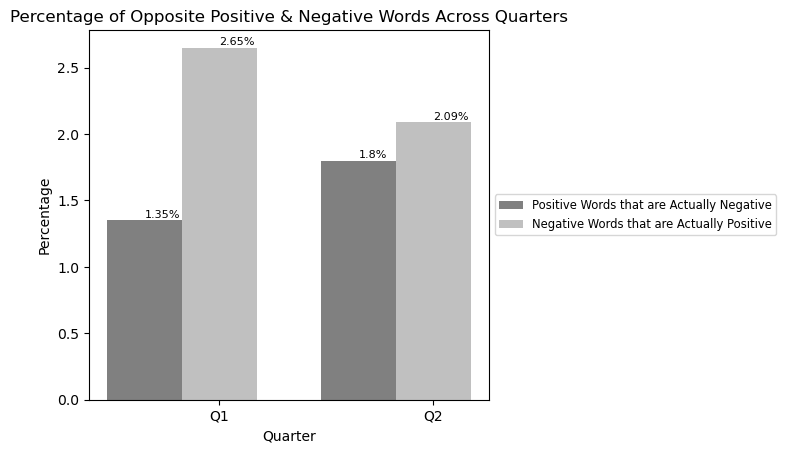

In [519]:
# Data
quarters = ['Q1', 'Q2']
pos_neg_per = [round(sum(opp_words_per_call(p3).values())/sum(pos_total1)*100, 2), round(sum(opp_words_per_call(p4).values())/sum(pos_total2)*100, 2)]
neg_pos_per = [round(sum(opp_words_per_call(n3).values())/sum(neg_total1)*100, 2), round(sum(opp_words_per_call(n4).values())/sum(neg_total2)*100, 2)]

# Set the positions and width for the bars
positions = range(len(quarters))
bar_width = 0.35

# Create the grouped bar graph
plt.bar(positions, pos_neg_per, bar_width, label='Positive Words that are Actually Negative', color='#808080')
plt.bar([pos + bar_width for pos in positions], neg_pos_per, bar_width, label='Negative Words that are Actually Positive', color='#C0C0C0')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.title('Percentage of Opposite Positive & Negative Words Across Quarters')
plt.xticks([pos + bar_width for pos in positions], quarters)

# Adding number labels to the bars
for i in range(len(quarters)):
    plt.text(positions[i], pos_neg_per[i] + 0.02, f"{pos_neg_per[i]}%", fontsize=8, color='black')
    plt.text(positions[i] + bar_width, neg_pos_per[i] + 0.02, f"{neg_pos_per[i]}%", fontsize=8, color='black')
    
# Move the legend to the side of the graph without changing graph size
plt.legend(loc='center left',fontsize='small',bbox_to_anchor=(1, 0.5))

# Displaying the bar graph
plt.subplots_adjust(right=0.75)  # Adjust right margin for legend
plt.show()

In [797]:
re_list = [item.lower() for item in open_file('W:\Alt Fund Mgmt\Sentiment-NLP\Real Estate Words.txt').split('\n')]
re_list

['occupancy',
 'nav',
 'net asset value',
 'noi',
 'net operating income',
 'same-store',
 'same store']

In [859]:
def real_estate(transcript):
    re_list = [item.lower() for item in open_file('W:\Alt Fund Mgmt\Sentiment-NLP\Real Estate Words.txt').split('\n')]
    r = []
    for i in range(len(transcript)):
        for item in re_list:
            terms = item.split()
            if transcript[i:i+len(terms)] == [term.lower() for term in terms]:
                r.append(item)
            elif transcript[i] == item.lower():
                r.append(item)
    return r, len(r), round(len(r)/len(transcript)*100, 2)

In [860]:
def real_estate_list(transcript_list):
    e = []
    for transcript in transcript_list:
        e.append(real_estate(transcript))
    return e

In [861]:
re1 = real_estate_list(transcript1)
re1

[(['noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'net operating income',
   'noi',
   'occupancy',
   'occupancy',
   'occupancy',
   'noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'net operating income',
   'net operating income',
   'noi'],
  23,
  0.35),
 (['occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy'],
  20,
  0.38),
 (['occupancy',
   'occupancy',
   'noi',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'noi',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'noi',
   'noi',
   'noi',
   'occupancy',
   'noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'noi',
   'occupancy',
 

In [862]:
re2 = real_estate_list(transcript2)
re2

[(['noi',
   'occupancy',
   'noi',
   'noi',
   'noi',
   'noi',
   'occupancy',
   'noi',
   'net operating income',
   'noi',
   'noi',
   'noi',
   'net operating income',
   'net operating income',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'net operating income',
   'net operating income',
   'net operating income',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'noi',
   'noi',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'noi',
   'occupancy'],
  40,
  0.66),
 (['occupancy',
   'net operating income',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'noi',
   'noi',
   'noi',
   'noi',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'occupancy',
   'nav',
   'occupancy'],
  20,
  0.36),
 (['occupancy',
   'noi',
   'occ

In [863]:
def real_estate_word_count(word_list):
    real_estate_list = real_estate(word_list)[0]
    re_count = sorted(Counter(real_estate_list).items(), key=lambda x: x[1], reverse=True)
    return re_count

In [864]:
def real_estate_count_list(transcript):
    count = []
    for text in transcript:
        count.append(real_estate_word_count(text))
    return count

In [865]:
re_count1 = real_estate_count_list(transcript1)
re_count1

[[('noi', 13), ('occupancy', 7), ('net operating income', 3)],
 [('occupancy', 15), ('noi', 5)],
 [('occupancy', 52), ('noi', 14)],
 [('occupancy', 15), ('noi', 7), ('net operating income', 1)],
 [('noi', 4), ('occupancy', 2)],
 [],
 [('occupancy', 13), ('noi', 5), ('net operating income', 1)],
 [('occupancy', 12), ('noi', 4), ('net operating income', 2)],
 [('occupancy', 22), ('noi', 14), ('nav', 2), ('net operating income', 1)],
 [('occupancy', 12), ('noi', 7)],
 [('noi', 15), ('occupancy', 8)],
 [('occupancy', 12), ('noi', 8)],
 [('occupancy', 13), ('noi', 3)],
 [('occupancy', 1)],
 [('occupancy', 9), ('noi', 2), ('net asset value', 1), ('nav', 1)],
 [('occupancy', 11), ('noi', 3), ('net operating income', 1)],
 [('occupancy', 11), ('noi', 9), ('nav', 1)],
 [('noi', 46), ('occupancy', 29)]]

In [866]:
re_count2 = real_estate_count_list(transcript2)
re_count2

[[('occupancy', 22), ('noi', 12), ('net operating income', 6)],
 [('occupancy', 14), ('noi', 4), ('net operating income', 1), ('nav', 1)],
 [('occupancy', 25), ('noi', 18)],
 [('occupancy', 8), ('noi', 5), ('net operating income', 1)],
 [('noi', 5), ('occupancy', 5)],
 [],
 [('occupancy', 9), ('noi', 6), ('net operating income', 1)],
 [('occupancy', 22), ('noi', 7)],
 [('occupancy', 17), ('noi', 12), ('net operating income', 1)],
 [('occupancy', 12), ('noi', 3)],
 [('occupancy', 15), ('noi', 12)],
 [('occupancy', 8), ('noi', 4)],
 [('occupancy', 22), ('noi', 3)],
 [('occupancy', 3)],
 [('occupancy', 12), ('noi', 6), ('nav', 1)],
 [('occupancy', 23), ('noi', 4), ('net operating income', 2)],
 [('occupancy', 16), ('noi', 14)],
 [('noi', 25), ('occupancy', 25)]]

In [867]:
def real_estate_top(count_list):
    word_sum = {}
    for call in count_list:
        for word, freq in call:
            if word in word_sum:
                word_sum[word] += freq
            else:
                word_sum[word] = freq
    total = sorted(word_sum.items(), key=lambda x: x[1], reverse=True)[:10]
    return total

In [868]:
real_estate_top(re_count1)

[('occupancy', 244),
 ('noi', 159),
 ('net operating income', 9),
 ('nav', 4),
 ('net asset value', 1)]

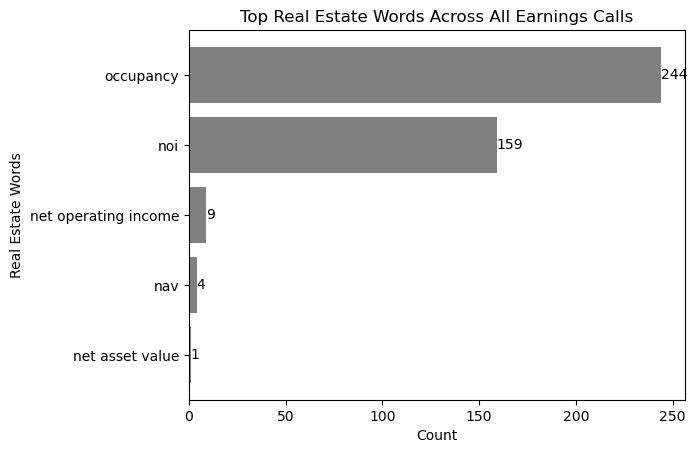

In [869]:
# Sort the data in descending order by values
sorted_data = sorted(real_estate_top_ten(re_count1), key=lambda x: x[1], reverse=False)

# Extract sorted keys and values from the sorted data
words = [item[0] for item in sorted_data]
frequencies = [item[1] for item in sorted_data]

# Plotting the horizontal bar graph
plt.barh(words, frequencies, color='#808080')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Real Estate Words')
plt.title('Top Real Estate Words Across All Earnings Calls')

# Adding number labels to the bars
for i in range(len(words)):
    plt.text(frequencies[i], i, str(frequencies[i]), ha='left', va='center')

# Displaying the bar graph
plt.show()

In [870]:
real_estate_top(re_count2)

[('occupancy', 258), ('noi', 140), ('net operating income', 12), ('nav', 2)]

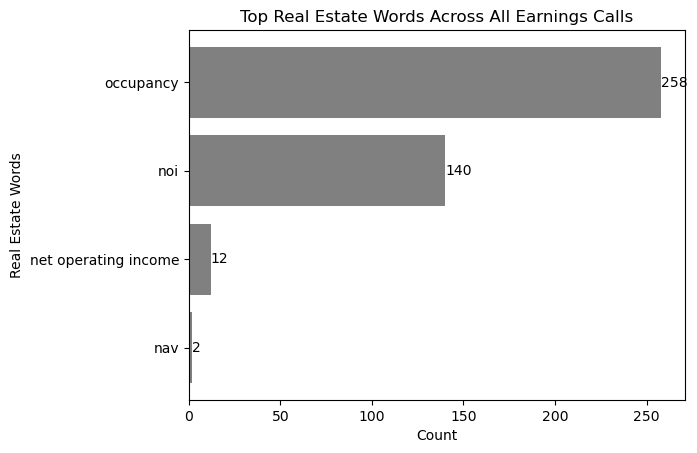

In [810]:
# Sort the data in descending order by values
sorted_data = sorted(real_estate_top_ten(re_count2), key=lambda x: x[1], reverse=False)

# Extract sorted keys and values from the sorted data
words = [item[0] for item in sorted_data]
frequencies = [item[1] for item in sorted_data]

# Plotting the horizontal bar graph
plt.barh(words, frequencies, color='#808080')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Real Estate Words')
plt.title('Top Real Estate Words Across All Earnings Calls')

# Adding number labels to the bars
for i in range(len(words)):
    plt.text(frequencies[i], i, str(frequencies[i]), ha='left', va='center')

# Displaying the bar graph
plt.show()

In [871]:
#Number of real estate words and percentages
re_num1 = []
re_num2 = []
re_per1 = []
re_per2 = []
for val in re1:
    re_num1.append(val[1])
    re_per1.append(val[2])
for val in re2:
    re_num2.append(val[1])
    re_per2.append(val[2])
print(re_num1)
print(re_num2)
print(re_per1)
print(re_per2)

[23, 20, 66, 23, 6, 0, 19, 18, 39, 19, 23, 20, 16, 1, 13, 15, 21, 75]
[40, 20, 43, 14, 10, 0, 16, 29, 30, 15, 27, 12, 25, 3, 19, 29, 30, 50]
[0.35, 0.38, 1.5, 0.56, 0.11, 0.0, 0.3, 0.61, 1.01, 0.41, 0.54, 0.37, 0.3, 0.02, 0.28, 0.43, 0.4, 1.77]
[0.66, 0.36, 1.1, 0.32, 0.19, 0.0, 0.28, 0.67, 0.89, 0.28, 0.62, 0.26, 0.49, 0.07, 0.44, 0.62, 0.61, 1.37]


In [872]:
re_q1 = {}
for a, b, c in zip(common_names, re_num1, re_per1):
    re_q1[a] = ['Q1', b, c]
re_q1

{'are': ['Q1', 23, 0.35],
 'bxp': ['Q1', 20, 0.38],
 'cold': ['Q1', 66, 1.5],
 'cuz': ['Q1', 23, 0.56],
 'dlr': ['Q1', 6, 0.11],
 'eqix': ['Q1', 0, 0.0],
 'eqr': ['Q1', 19, 0.3],
 'exr': ['Q1', 18, 0.61],
 'hr': ['Q1', 39, 1.01],
 'invh': ['Q1', 19, 0.41],
 'kim': ['Q1', 23, 0.54],
 'krc': ['Q1', 20, 0.37],
 'maa': ['Q1', 16, 0.3],
 'o': ['Q1', 1, 0.02],
 'pld': ['Q1', 13, 0.28],
 'psa': ['Q1', 15, 0.43],
 'reg': ['Q1', 21, 0.4],
 'vtr': ['Q1', 75, 1.77]}

In [876]:
re_q2 = {}
for a, b, c in zip(common_names, re_num2, re_per2):
    re_q2[a] = ['Q2', b, c]
re_q2

{'are': ['Q2', 40, 0.66],
 'bxp': ['Q2', 20, 0.36],
 'cold': ['Q2', 43, 1.1],
 'cuz': ['Q2', 14, 0.32],
 'dlr': ['Q2', 10, 0.19],
 'eqix': ['Q2', 0, 0.0],
 'eqr': ['Q2', 16, 0.28],
 'exr': ['Q2', 29, 0.67],
 'hr': ['Q2', 30, 0.89],
 'invh': ['Q2', 15, 0.28],
 'kim': ['Q2', 27, 0.62],
 'krc': ['Q2', 12, 0.26],
 'maa': ['Q2', 25, 0.49],
 'o': ['Q2', 3, 0.07],
 'pld': ['Q2', 19, 0.44],
 'psa': ['Q2', 29, 0.62],
 'reg': ['Q2', 30, 0.61],
 'vtr': ['Q2', 50, 1.37]}

In [877]:
df1 = pd.DataFrame(re_q1)
df1 = df1.T
df1.reset_index(drop=False, inplace=True)
df1.columns = ['Investment', 'Quarter', 'Number of Real Estate Words', 'Percentage of Real Estate Words']
df1

Investment Quarter Number of Real Estate Words  \
0         are      Q1                          23   
1         bxp      Q1                          20   
2        cold      Q1                          66   
3         cuz      Q1                          23   
4         dlr      Q1                           6   
5        eqix      Q1                           0   
6         eqr      Q1                          19   
7         exr      Q1                          18   
8          hr      Q1                          39   
9        invh      Q1                          19   
10        kim      Q1                          23   
11        krc      Q1                          20   
12        maa      Q1                          16   
13          o      Q1                           1   
14        pld      Q1                          13   
15        psa      Q1                          15   
16        reg      Q1                          21   
17        vtr      Q1                          75   

   Percentage of Real Estate Words  
0                             0.35  
1                             0.38  
2                              1.5  
3                             0.56  
4                             0.11  
5                              0.0  
6                              0.3  
7                             0.61  
8                             1.01  
9                             0.41  
10                            0.54  
11                            0.37  
12                             0.3  
13                            0.02  
14                            0.28  
15                            0.43  
16                             0.4  
17                            1.77

In [878]:
df2 = pd.DataFrame(re_q2)
df2 = df2.T
df2.reset_index(drop=False, inplace=True)
df2.columns = ['Investment', 'Quarter', 'Number of Real Estate Words', 'Percentage of Real Estate Words']
df2

Investment Quarter Number of Real Estate Words  \
0         are      Q2                          40   
1         bxp      Q2                          20   
2        cold      Q2                          43   
3         cuz      Q2                          14   
4         dlr      Q2                          10   
5        eqix      Q2                           0   
6         eqr      Q2                          16   
7         exr      Q2                          29   
8          hr      Q2                          30   
9        invh      Q2                          15   
10        kim      Q2                          27   
11        krc      Q2                          12   
12        maa      Q2                          25   
13          o      Q2                           3   
14        pld      Q2                          19   
15        psa      Q2                          29   
16        reg      Q2                          30   
17        vtr      Q2                          50   

   Percentage of Real Estate Words  
0                             0.66  
1                             0.36  
2                              1.1  
3                             0.32  
4                             0.19  
5                              0.0  
6                             0.28  
7                             0.67  
8                             0.89  
9                             0.28  
10                            0.62  
11                            0.26  
12                            0.49  
13                            0.07  
14                            0.44  
15                            0.62  
16                            0.61  
17                            1.37

In [879]:
df = pd.concat([df1, df2], ignore_index=True)
df = df.sort_values(by='Investment')
df = df.set_index('Investment').reset_index()
df

Investment Quarter Number of Real Estate Words  \
0         are      Q1                          23   
1         are      Q2                          40   
2         bxp      Q1                          20   
3         bxp      Q2                          20   
4        cold      Q1                          66   
5        cold      Q2                          43   
6         cuz      Q2                          14   
7         cuz      Q1                          23   
8         dlr      Q2                          10   
9         dlr      Q1                           6   
10       eqix      Q1                           0   
11       eqix      Q2                           0   
12        eqr      Q2                          16   
13        eqr      Q1                          19   
14        exr      Q1                          18   
15        exr      Q2                          29   
16         hr      Q1                          39   
17         hr      Q2                          30   
18       invh      Q1                          19   
19       invh      Q2                          15   
20        kim      Q2                          27   
21        kim      Q1                          23   
22        krc      Q2                          12   
23        krc      Q1                          20   
24        maa      Q1                          16   
25        maa      Q2                          25   
26          o      Q2                           3   
27          o      Q1                           1   
28        pld      Q2                          19   
29        pld      Q1                          13   
30        psa      Q2                          29   
31        psa      Q1                          15   
32        reg      Q2                          30   
33        reg      Q1                          21   
34        vtr      Q1                          75   
35        vtr      Q2                          50   

   Percentage of Real Estate Words  
0                             0.35  
1                             0.66  
2                             0.38  
3                             0.36  
4                              1.5  
5                              1.1  
6                             0.32  
7                             0.56  
8                             0.19  
9                             0.11  
10                             0.0  
11                             0.0  
12                            0.28  
13                             0.3  
14                            0.61  
15                            0.67  
16                            1.01  
17                            0.89  
18                            0.41  
19                            0.28  
20                            0.62  
21                            0.54  
22                            0.26  
23                            0.37  
24                             0.3  
25                            0.49  
26                            0.07  
27                            0.02  
28                            0.44  
29                            0.28  
30                            0.62  
31                            0.43  
32                            0.61  
33                             0.4  
34                            1.77  
35                            1.37

In [833]:
def re_list_to_set(list_):
    l = []
    s = []
    for a in list_:
        l.append(a[0])
    for b in l:
        s.append(set(b))
    return s

In [838]:
s1 = re_list_to_set(re1)
s1

[{'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 set(),
 {'net operating income', 'noi', 'occupancy'},
 {'net operating income', 'noi', 'occupancy'},
 {'nav', 'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'occupancy'},
 {'nav', 'net asset value', 'noi', 'occupancy'},
 {'net operating income', 'noi', 'occupancy'},
 {'nav', 'noi', 'occupancy'},
 {'noi', 'occupancy'}]

In [839]:
s2 = re_list_to_set(re2)
s2

[{'net operating income', 'noi', 'occupancy'},
 {'nav', 'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 set(),
 {'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'occupancy'},
 {'nav', 'noi', 'occupancy'},
 {'net operating income', 'noi', 'occupancy'},
 {'noi', 'occupancy'},
 {'noi', 'occupancy'}]

In [840]:
five_words_list(s1, full_transcript1)

{'are': [['submarkets', 'annual', 'noi', 'for', 'these'],
  ['result', 'in', 'noi', 'from', 'delivery'],
  ['on', 'inplace', 'noi', 'at', 'closing'],
  ['same', 'property', 'noi', 'growth', 'of'],
  ['same', 'property', 'noi', 'growth', 'is'],
  ['of', 'this', 'noi', 'will', 'commence'],
  ['on', 'are', 'noi', 'and', 'getting'],
  ['up', 'that', 'noi', 'to', 'value'],
  ['from', 'an', 'noi', 'perspective', 'if'],
  ['any', 'significant', 'noi', 'being', 'generated'],
  ['amount', 'of', 'noi', 'from', 'that'],
  ['some', 'meaningful', 'noi', 'associated', 'with'],
  ['million', 'of', 'noi', 'and', 'for'],
  ['our', 'strong', 'occupancy', 'wa', 'in'],
  ['our', 'expectation', 'occupancy', 'wa', 'a'],
  ['here', 'first', 'occupancy', 'is', 'expected'],
  ['leased', 'with', 'occupancy', 'of', 'some'],
  ['cash', 'and', 'occupancy', 'wa', 'adjusted'],
  ['leased', 'importantly', 'occupancy', 'is', 'expected'],
  ['moderation', 'in', 'occupancy', 'level', 'a']],
 'bxp': [['than', 'projected'

In [842]:
five_words_list(s2, full_transcript2)

{'are': [['foot', 'and', 'noi', 'wa', 'up'],
  ['solid', 'samestore', 'noi', 'increase', 'also'],
  ['project', 'annual', 'noi', 'for', 'this'],
  ['addition', 'to', 'noi', 'to', 'million'],
  ['annual', 'incremental', 'noi', 'primarily', 'through'],
  ['quarter', 'of', 'noi', 'wa', 'up'],
  ['the', 'significant', 'noi', 'growth', 'from'],
  ['at', 'sameproperty', 'noi', 'growth', 'wa'],
  ['for', 'sameproperty', 'noi', 'growth', 'remains'],
  ['relates', 'to', 'noi', 'vikram', 'i'],
  ['at', 'the', 'noi', 'line', 'item'],
  ['amount', 'of', 'noi', 'and', 'that'],
  ['growth', 'stable', 'occupancy', 'and', 'solid'],
  ['reflects', 'it', 'occupancy', 'the', 'negative'],
  ['second', 'quarter', 'occupancy', 'wa', 'inline'],
  ['first', 'quarter', 'occupancy', 'our', 'outlook'],
  ['reflects', 'flat', 'occupancy', 'from', 'the'],
  ['quarter', 'and', 'occupancy', 'growth', 'in'],
  ['midpoint', 'of', 'occupancy', 'guidance', 'is'],
  ['is', 'and', 'occupancy', 'a', 'of'],
  ['ready', 'for

In [844]:
pos_words, neg_words = get_pos_neg_words()

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [846]:
re_p1 = opposite_meaning(five_words_list(s1, full_transcript1), pos_words)
re_p1

{'are': [('noi', 'significant'),
  ('noi', 'meaningful'),
  ('occupancy', 'strong')],
 'bxp': [('noi', 'guidance'), ('occupancy', 'gain')],
 'cold': [('noi', 'positive'),
  ('occupancy', 'meaningful'),
  ('occupancy', 'like'),
  ('occupancy', 'pretty'),
  ('occupancy', 'gain'),
  ('occupancy', 'tough'),
  ('occupancy', 'helping'),
  ('occupancy', 'helping')],
 'cuz': [('noi', 'positive'), ('occupancy', 'like'), ('occupancy', 'like')],
 'eqr': [('noi', 'positive'),
  ('occupancy', 'stable'),
  ('occupancy', 'strong'),
  ('occupancy', 'stronger'),
  ('occupancy', 'right'),
  ('occupancy', 'right')],
 'exr': [('occupancy', 'improvement')],
 'hr': [('occupancy', 'gain'),
  ('occupancy', 'gain'),
  ('occupancy', 'significant'),
  ('occupancy', 'steady'),
  ('occupancy', 'gain'),
  ('occupancy', 'gain'),
  ('occupancy', 'gain'),
  ('occupancy', 'improvement'),
  ('occupancy', 'steady'),
  ('occupancy', 'gain')],
 'invh': [('noi', 'improvement'),
  ('occupancy', 'improved'),
  ('occupancy', '

In [847]:
re_n1 = opposite_meaning(five_words_list(s1, full_transcript1), neg_words)
re_n1

{'cold': [('occupancy', 'drag'), ('occupancy', 'bump')],
 'kim': [('occupancy', 'bust')],
 'krc': [('noi', 'delayed')],
 'pld': [('occupancy', 'loss')],
 'vtr': [('occupancy', 'aggressive'),
  ('occupancy', 'loss'),
  ('occupancy', 'decline')]}

In [848]:
re_p2 = opposite_meaning(five_words_list(s2, full_transcript2), pos_words)
re_p2

{'are': [('noi', 'solid'),
  ('noi', 'significant'),
  ('occupancy', 'stable'),
  ('occupancy', 'guidance'),
  ('occupancy', 'ready'),
  ('occupancy', 'gain')],
 'bxp': [('occupancy', 'gain'),
  ('occupancy', 'gain'),
  ('occupancy', 'stable'),
  ('occupancy', 'gain')],
 'cold': [('noi', 'helped'),
  ('noi', 'like'),
  ('occupancy', 'meaningful'),
  ('occupancy', 'strong')],
 'dlr': [('noi', 'guidance')],
 'eqr': [('noi', 'guidance'), ('noi', 'guidance')],
 'exr': [('noi', 'better'), ('occupancy', 'improve')],
 'hr': [('noi', 'strong'),
  ('noi', 'guidance'),
  ('noi', 'guidance'),
  ('occupancy', 'gain'),
  ('occupancy', 'gain'),
  ('occupancy', 'gain'),
  ('occupancy', 'gain'),
  ('occupancy', 'boost'),
  ('occupancy', 'gain'),
  ('occupancy', 'bolster')],
 'invh': [('noi', 'guidance'), ('occupancy', 'strong'), ('occupancy', 'like')],
 'kim': [('noi', 'positive'),
  ('noi', 'guidance'),
  ('occupancy', 'gain'),
  ('occupancy', 'boost'),
  ('occupancy', 'right')],
 'krc': [('noi', 'be

In [849]:
re_n2 = opposite_meaning(five_words_list(s2, full_transcript2), neg_words)
re_n2

{'are': [('occupancy', 'negative')],
 'cold': [('noi', 'lost'), ('occupancy', 'decline')],
 'eqr': [('occupancy', 'drag')],
 'exr': [('occupancy', 'fell')],
 'hr': [('noi', 'decline')],
 'invh': [('occupancy', 'bad')],
 'kim': [('occupancy', 'loss')],
 'maa': [('occupancy', 'issue')],
 'psa': [('occupancy', 'decline'),
  ('occupancy', 'loss'),
  ('occupancy', 'decline')],
 'reg': [('occupancy', 'loss'), ('occupancy', 'loss')],
 'vtr': [('occupancy', 'lagging'),
  ('occupancy', 'decline'),
  ('occupancy', 'weakness')]}

In [850]:
count_opposite_words(re_p1)

{'are': {'significant': 1, 'meaningful': 1, 'strong': 1},
 'bxp': {'guidance': 1, 'gain': 1},
 'cold': {'positive': 1,
  'meaningful': 1,
  'like': 1,
  'pretty': 1,
  'gain': 1,
  'tough': 1,
  'helping': 2},
 'cuz': {'positive': 1, 'like': 2},
 'eqr': {'positive': 1, 'stable': 1, 'strong': 1, 'stronger': 1, 'right': 2},
 'exr': {'improvement': 1},
 'hr': {'gain': 6, 'significant': 1, 'steady': 2, 'improvement': 1},
 'invh': {'improvement': 1,
  'improved': 1,
  'benefit': 1,
  'strong': 1,
  'like': 1},
 'kim': {'strong': 2, 'robust': 1},
 'krc': {'positive': 1, 'better': 1, 'guidance': 2},
 'maa': {'stable': 1, 'steady': 1},
 'pld': {'guidance': 1},
 'psa': {'good': 1, 'gain': 1, 'uplift': 1, 'gaining': 1},
 'reg': {'guidance': 1, 'well': 1},
 'vtr': {'significant': 3,
  'available': 1,
  'better': 1,
  'outstanding': 1,
  'recovery': 2,
  'excellent': 1,
  'guidance': 1,
  'thank': 1,
  'happy': 1,
  'consistently': 1,
  'improvement': 1,
  'gain': 1,
  'well': 1}}

In [851]:
count_opposite_words(re_n1)

{'cold': {'drag': 1, 'bump': 1},
 'kim': {'bust': 1},
 'krc': {'delayed': 1},
 'pld': {'loss': 1},
 'vtr': {'aggressive': 1, 'loss': 1, 'decline': 1}}

In [852]:
count_opposite_words(re_p2)

{'are': {'solid': 1,
  'significant': 1,
  'stable': 1,
  'guidance': 1,
  'ready': 1,
  'gain': 1},
 'bxp': {'gain': 3, 'stable': 1},
 'cold': {'helped': 1, 'like': 1, 'meaningful': 1, 'strong': 1},
 'dlr': {'guidance': 1},
 'eqr': {'guidance': 2},
 'exr': {'better': 1, 'improve': 1},
 'hr': {'strong': 1, 'guidance': 2, 'gain': 5, 'boost': 1, 'bolster': 1},
 'invh': {'guidance': 1, 'strong': 1, 'like': 1},
 'kim': {'positive': 1, 'guidance': 1, 'gain': 1, 'boost': 1, 'right': 1},
 'krc': {'beneficiary': 1, 'guidance': 1},
 'maa': {'support': 1,
  'steady': 1,
  'stable': 1,
  'consistent': 1,
  'guidance': 1,
  'like': 2},
 'pld': {'guidance': 1},
 'psa': {'like': 1, 'strong': 1, 'well': 1},
 'reg': {'positive': 1, 'gain': 1},
 'vtr': {'led': 1,
  'recovery': 1,
  'guidance': 2,
  'shine': 1,
  'improvement': 1,
  'better': 1,
  'like': 1}}

In [853]:
count_opposite_words(re_n2)

{'are': {'negative': 1},
 'cold': {'lost': 1, 'decline': 1},
 'eqr': {'drag': 1},
 'exr': {'fell': 1},
 'hr': {'decline': 1},
 'invh': {'bad': 1},
 'kim': {'loss': 1},
 'maa': {'issue': 1},
 'psa': {'decline': 2, 'loss': 1},
 'reg': {'loss': 2},
 'vtr': {'lagging': 1, 'decline': 1, 'weakness': 1}}

In [854]:
re_pos1 = []
for tup in re_p1.values():
    for first, second in tup:
        re_pos1.append(first)
dict(sorted(Counter(re_pos1).items(), key=lambda x: (-x[1], x[0])))

{'occupancy': 48, 'noi': 22}

In [855]:
re_neg1 = []
for tup in re_n1.values():
    for first, second in tup:
        re_neg1.append(first)
dict(sorted(Counter(re_neg1).items(), key=lambda x: (-x[1], x[0])))

{'occupancy': 7, 'noi': 1}

In [856]:
re_pos2 = []
for tup in re_p2.values():
    for first, second in tup:
        re_pos2.append(first)
dict(sorted(Counter(re_pos2).items(), key=lambda x: (-x[1], x[0])))

{'occupancy': 39, 'noi': 21}

In [857]:
re_neg2 = []
for tup in re_n2.values():
    for first, second in tup:
        re_neg2.append(first)
dict(sorted(Counter(re_neg2).items(), key=lambda x: (-x[1], x[0])))

{'occupancy': 15, 'noi': 2}

In [923]:
def re_pos_neg_dict_count(dict_):    
    word_count = {}
    for dictionary in dict_.values():
        for word, count in dictionary.items():
            if word in word_count:
                word_count[word] += count
            else:
                word_count[word] = count
    return dict(sorted(Counter(word_count).items(), key=lambda x: (-x[1], x[0])))

In [924]:
re_pos_neg_dict_count(count_opposite_words(re_p1))

{'gain': 10,
 'guidance': 6,
 'significant': 5,
 'strong': 5,
 'improvement': 4,
 'like': 4,
 'positive': 4,
 'steady': 3,
 'better': 2,
 'helping': 2,
 'meaningful': 2,
 'recovery': 2,
 'right': 2,
 'stable': 2,
 'well': 2,
 'available': 1,
 'benefit': 1,
 'consistently': 1,
 'excellent': 1,
 'gaining': 1,
 'good': 1,
 'happy': 1,
 'improved': 1,
 'outstanding': 1,
 'pretty': 1,
 'robust': 1,
 'stronger': 1,
 'thank': 1,
 'tough': 1,
 'uplift': 1}

In [925]:
re_pos_neg_dict_count(count_opposite_words(re_n1))

{'loss': 2,
 'aggressive': 1,
 'bump': 1,
 'bust': 1,
 'decline': 1,
 'delayed': 1,
 'drag': 1}

In [926]:
re_pos_neg_dict_count(count_opposite_words(re_p2))

{'guidance': 13,
 'gain': 11,
 'like': 6,
 'strong': 4,
 'stable': 3,
 'better': 2,
 'boost': 2,
 'positive': 2,
 'beneficiary': 1,
 'bolster': 1,
 'consistent': 1,
 'helped': 1,
 'improve': 1,
 'improvement': 1,
 'led': 1,
 'meaningful': 1,
 'ready': 1,
 'recovery': 1,
 'right': 1,
 'shine': 1,
 'significant': 1,
 'solid': 1,
 'steady': 1,
 'support': 1,
 'well': 1}

In [927]:
re_pos_neg_dict_count(count_opposite_words(re_n2))

{'decline': 5,
 'loss': 4,
 'bad': 1,
 'drag': 1,
 'fell': 1,
 'issue': 1,
 'lagging': 1,
 'lost': 1,
 'negative': 1,
 'weakness': 1}

In [889]:
def re_pos_neg_graph(dict_, title):    
    # Sort the data in descending order by values
    sorted_data = dict(sorted(dict_.items(), key=lambda item: item[1], reverse=False))

    # Extract sorted keys and values from the sorted data
    names2 = list(sorted_data.keys())
    values = list(sorted_data.values())

    # Plotting the horizontal bar graph
    plt.barh(names2, values, color='gray')

    # Adding labels and title
    plt.xlabel('Frequency')
    plt.ylabel('Earnings Call')
    plt.title(title)

    # Add number labels to the bars
    for index, value in enumerate(values):
        plt.text(value, index, str(value), ha='left', va='center')

    # Displaying the bar graph
    plt.tight_layout()
    plt.show()

In [884]:
a = opp_words_per_call(count_opposite_words(re_p1))
a

{'are': 3,
 'bxp': 2,
 'cold': 8,
 'cuz': 3,
 'eqr': 6,
 'exr': 1,
 'hr': 10,
 'invh': 5,
 'kim': 3,
 'krc': 4,
 'maa': 2,
 'pld': 1,
 'psa': 4,
 'reg': 2,
 'vtr': 16}

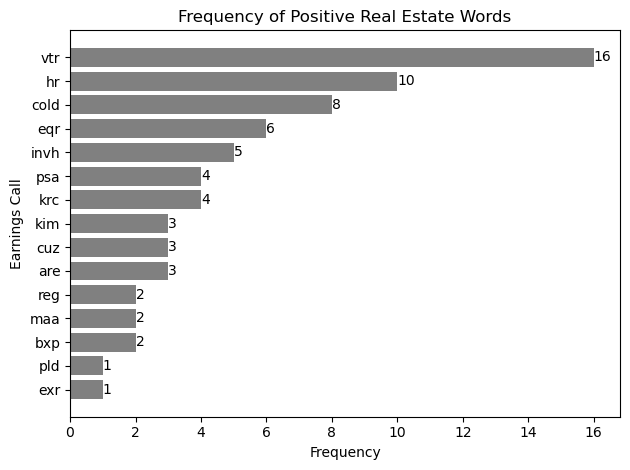

In [890]:
re_pos_neg_graph(a, 'Frequency of Positive Real Estate Words')

In [885]:
b = opp_words_per_call(count_opposite_words(re_n1))
b

{'cold': 2, 'kim': 1, 'krc': 1, 'pld': 1, 'vtr': 3}

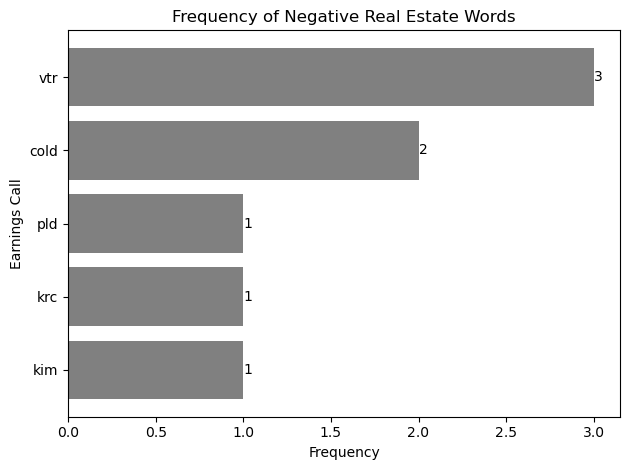

In [891]:
re_pos_neg_graph(b, 'Frequency of Negative Real Estate Words')

In [886]:
c = opp_words_per_call(count_opposite_words(re_p2))
c

{'are': 6,
 'bxp': 4,
 'cold': 4,
 'dlr': 1,
 'eqr': 2,
 'exr': 2,
 'hr': 10,
 'invh': 3,
 'kim': 5,
 'krc': 2,
 'maa': 7,
 'pld': 1,
 'psa': 3,
 'reg': 2,
 'vtr': 8}

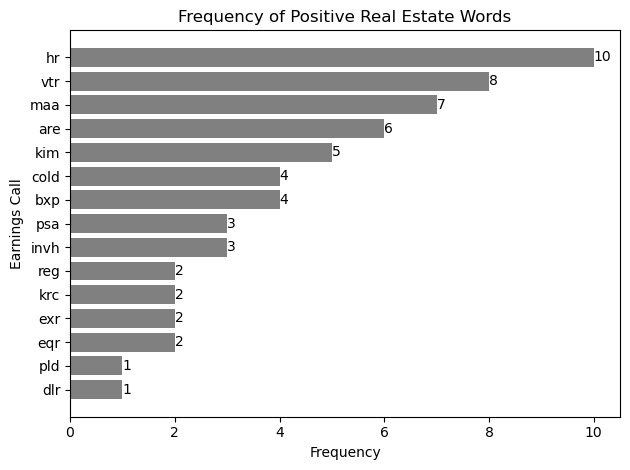

In [892]:
re_pos_neg_graph(c, 'Frequency of Positive Real Estate Words')

In [887]:
d = opp_words_per_call(count_opposite_words(re_n2))
d

{'are': 1,
 'cold': 2,
 'eqr': 1,
 'exr': 1,
 'hr': 1,
 'invh': 1,
 'kim': 1,
 'maa': 1,
 'psa': 3,
 'reg': 2,
 'vtr': 3}

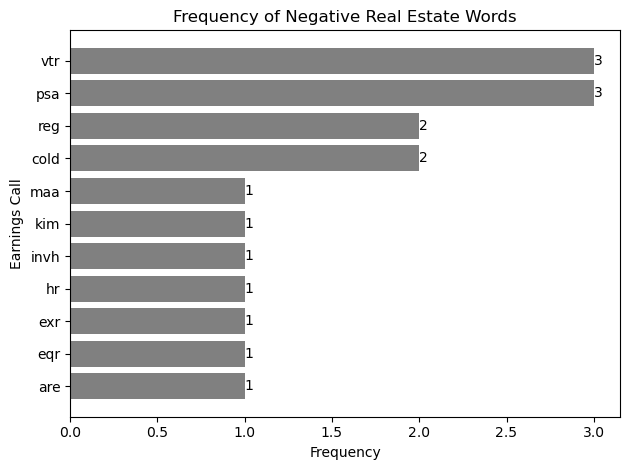

In [893]:
re_pos_neg_graph(d, 'Frequency of Negative Real Estate Words')

In [900]:
print(sum(dict(sorted(Counter(re_pos1).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(count_opposite_words(re_p1)).values()))
print(sum(dict(sorted(Counter(re_neg1).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(count_opposite_words(re_n1)).values()))
print(sum(dict(sorted(Counter(re_pos2).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(count_opposite_words(re_p2)).values()))
print(sum(dict(sorted(Counter(re_neg2).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(opp_words_per_call(count_opposite_words(re_n2)).values()))

70
70
8
8
60
60
17
17


In [902]:
print('Total Number of Positive Real Estate Words (Q1):', sum(opp_words_per_call(count_opposite_words(re_p1)).values()))
print('Total Number of Positive Real Estate Words (Q2):', sum(opp_words_per_call(count_opposite_words(re_p2)).values()))
print('Total Number of Negative Real Estate Words (Q1):', sum(opp_words_per_call(count_opposite_words(re_n1)).values()))
print('Total Number of Negative Real Estate Words (Q2):', sum(opp_words_per_call(count_opposite_words(re_n2)).values()))

Total Number of Positive Real Estate Words (Q1): 70
Total Number of Positive Real Estate Words (Q2): 60
Total Number of Negative Real Estate Words (Q1): 8
Total Number of Negative Real Estate Words (Q2): 17


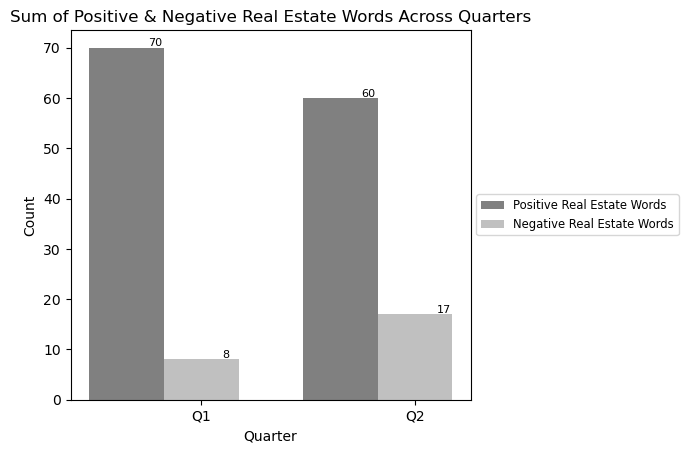

In [904]:
# Data
quarters = ['Q1', 'Q2']
pos_re = [sum(opp_words_per_call(count_opposite_words(re_p1)).values()), sum(opp_words_per_call(count_opposite_words(re_p2)).values())]
neg_re = [sum(opp_words_per_call(count_opposite_words(re_n1)).values()), sum(opp_words_per_call(count_opposite_words(re_n2)).values())]

# Set the positions and width for the bars
positions = range(len(quarters))
bar_width = 0.35

# Create the grouped bar graph
plt.bar(positions, pos_re, bar_width, label='Positive Real Estate Words', color='#808080')
plt.bar([pos + bar_width for pos in positions], neg_re, bar_width, label='Negative Real Estate Words', color='#C0C0C0')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Sum of Positive & Negative Real Estate Words Across Quarters')
plt.xticks([pos + bar_width for pos in positions], quarters)

# Adding number labels to the bars
for i in range(len(quarters)):
    plt.text(positions[i] + 0.1, pos_re[i] + 0.3, str(pos_re[i]), fontsize=8)
    plt.text(positions[i] + bar_width + 0.1, neg_re[i] + 0.3, str(neg_re[i]), fontsize=8)
    
# Move the legend to the side of the graph without changing graph size
plt.legend(loc='center left',fontsize='small',bbox_to_anchor=(1, 0.5))

# Displaying the bar graph
plt.subplots_adjust(right=0.75)  # Adjust right margin for legend
plt.show()